In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy
import statsmodels.api as sm
import folium
from folium.plugins import MarkerCluster

# the below extension properly formats a cell after it is run
%load_ext nb_black 

# Set the maximum number of rows to 200
pd.set_option("display.max_rows", 200)
import pandas as pd

# Set the maximum number of columns to 200
pd.set_option('display.max_columns', 200)



<IPython.core.display.Javascript object>

In [2]:
housing_no_na = pd.read_csv("data/housing_no_na.csv")

<IPython.core.display.Javascript object>

In [3]:
housing_no_na.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PID',
       'PavedDrive', 'PoolArea', 'P

<IPython.core.display.Javascript object>

In [18]:
# checking for highly inbalanced distributions
for col in housing_no_na.columns:
    value_counts = housing_no_na[col].value_counts(normalize=True)
    highest_freq = value_counts.max()
    if highest_freq > 0.95:
        print(f"Column {col} has highest frequency of {highest_freq:.2%}")

Column Street has highest frequency of 99.61%
Column Utilities has highest frequency of 99.92%
Column LandSlope has highest frequency of 95.27%
Column Condition2 has highest frequency of 99.03%
Column RoofMatl has highest frequency of 98.60%
Column Heating has highest frequency of 98.45%
Column LowQualFinSF has highest frequency of 98.72%
Column KitchenAbvGr has highest frequency of 95.85%
Column 3SsnPorch has highest frequency of 98.84%
Column PoolArea has highest frequency of 99.65%
Column PoolQC has highest frequency of 99.65%
Column MiscFeature has highest frequency of 96.24%
Column MiscVal has highest frequency of 96.32%


<IPython.core.display.Javascript object>

In [19]:
# checking for correlation among the variables with highly inbalanced distributions
high_freq_cols = [
    "Street",
    "Utilities",
    "LandSlope",
    "Condition2",
    "RoofMatl",
    "Heating",
    "LowQualFinSF",
    "KitchenAbvGr",
    "3SsnPorch",
    "PoolArea",
    "PoolQC",
    "MiscFeature",
    "MiscVal",
]

# create a subset of the housing_no_na dataframe with only the selected columns
subset = housing_no_na[high_freq_cols]

# create a correlation matrix
corr_matrix = subset.corr()

# display the correlation matrix
print(corr_matrix)

              LowQualFinSF  KitchenAbvGr  3SsnPorch  PoolArea   MiscVal
LowQualFinSF      1.000000     -0.014375  -0.002534 -0.005239 -0.005184
KitchenAbvGr     -0.014375      1.000000  -0.019766 -0.010906  0.040088
3SsnPorch        -0.002534     -0.019766   1.000000 -0.005441  0.001152
PoolArea         -0.005239     -0.010906  -0.005441  1.000000  0.021245
MiscVal          -0.005184      0.040088   0.001152  0.021245  1.000000


<IPython.core.display.Javascript object>

In [20]:
housing_no_na[
    [
        "Street",
        "Utilities",
        "LandSlope",
        "Condition2",
        "RoofMatl",
        "Heating",
        "LowQualFinSF",
        "KitchenAbvGr",
        "3SsnPorch",
        "PoolArea",
        "PoolQC",
        "MiscFeature",
        "MiscVal",
    ]
].dtypes

Street          object
Utilities       object
LandSlope       object
Condition2      object
RoofMatl        object
Heating         object
LowQualFinSF     int64
KitchenAbvGr     int64
3SsnPorch        int64
PoolArea         int64
PoolQC          object
MiscFeature     object
MiscVal          int64
dtype: object

<IPython.core.display.Javascript object>

In [21]:
# define the independent and dependent variables
X = housing_no_na[
    [
        "Street",
        "Utilities",
        "LandSlope",
        "Condition2",
        "RoofMatl",
        "Heating",
        "LowQualFinSF",
        "KitchenAbvGr",
        "3SsnPorch",
        "PoolArea",
        "PoolQC",
        "MiscFeature",
        "MiscVal",
    ]
]
y = housing_no_na["SalePrice"]

# create dummy variables for categorical columns
X = pd.get_dummies(X)

# add a constant to the independent variables
X = sm.add_constant(X)

# fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     7.098
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           3.92e-32
Time:                        10:42:16   Log-Likelihood:                -32502.
No. Observations:                2580   AIC:                         6.508e+04
Df Residuals:                    2544   BIC:                         6.529e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8.521e+04   4.18e+0

<IPython.core.display.Javascript object>

In [5]:
# It appears that only a few of the features have a statistically significant relationship with the SalePrice. 
# These features have a p-value less than 0.05 and indicate that there is a high likelihood that 
# the coefficient is not equal to zero. These features are: Street, Utilities, LandSlope, Condition2,
# RoofMatl, Heating, PoolQC, and KitchenAbvGr. 

# I am going to drop the columns with no relationship with the sale price and highly imbalanced distributions. 

columns_to_drop = ["3SsnPorch", "PoolArea", "MiscFeature", "LowQualFinSF"]
housing_cleaned = housing_no_na.drop(columns_to_drop, axis=1)

# since i removed the misc house features Im also going to remove the value of these items
housing_cleaned['SalePrice'] = housing_cleaned['SalePrice'] - housing_cleaned['MiscVal']

# and will now remove the MiscVal column
housing_cleaned.drop('MiscVal', axis=1, inplace=True)



 


<IPython.core.display.Javascript object>

In [23]:
# Some key takeaways from running the below:
# SalePrice has a mean value of approximately 178,011 and a standard deviation of approximately 75,042.
# The YearBuilt column has a minimum value of 1872 and a maximum value of 2010, indicating that the
#     houses in the dataset were built over a wide range of years.
# The GrLivArea column has a mean value of approximately 1,486 square feet and a standard deviation
#     of approximately 489 square feet, indicating that there is a wide range in the sizes of the living
#     areas in the houses in the dataset.
# The OverallQual column has a mean value of approximately 6, indicating that most of the houses in the
#     dataset are rated as having an above average overall quality.
# The GarageCars column has a mean value of approximately 1.75, indicating that most of the houses in
#     the dataset have a 1-2 car garage.
# The TotRmsAbvGrd column has a mean value of approximately 6, indicating that most of the houses in
#     the dataset have between 5-7 rooms above ground.
# The Fireplaces column has a mean value of approximately 0.6, indicating that most of the houses in
#     the dataset have at least one fireplace.

housing_cleaned.describe()

PID    GrLivArea      SalePrice   MSSubClass  LotFrontage  \
count  2.580000e+03  2580.000000    2580.000000  2580.000000  2580.000000   
mean   7.148300e+08  1486.039922  178010.891860    57.691860    56.246899   
std    1.886626e+08   488.650181   75042.160446    42.802105    33.442906   
min    5.263011e+08   334.000000   12789.000000    20.000000     0.000000   
25%    5.313630e+08  1112.000000  129900.000000    20.000000    40.000000   
50%    5.354546e+08  1436.000000  159500.000000    50.000000    61.000000   
75%    9.071811e+08  1733.000000  209625.000000    70.000000    78.000000   
max    1.007100e+09  4676.000000  755000.000000   190.000000   313.000000   

             LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count    2580.000000  2580.000000  2580.000000  2580.000000   2580.000000   
mean    10120.153488     6.046124     5.618605  1970.313953   1983.751938   
std      8126.937892     1.367590     1.122008    29.719705     20.490242   
min      1300.000000     1.000000     1.000000  1872.000000   1950.000000   
25%      7406.750000     5.000000     5.000000  1953.000000   1965.000000   
50%      9391.000000     6.000000     5.000000  1972.000000   1992.000000   
75%     11494.000000     7.000000     6.000000  1999.000000   2003.000000   
max    215245.000000    10.000000     9.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  2580.000000  2580.000000  2580.000000  2580.000000  2580.000000   
mean     98.769380   444.174031    53.218217   538.892636  1036.284884   
std     175.546045   429.340844   174.393251   425.249665   418.971677   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   214.750000   791.750000   
50%       0.000000   384.000000     0.000000   448.000000   979.000000   
75%     157.000000   732.000000     0.000000   784.000000  1266.250000   
max    1600.000000  2288.000000  1526.000000  2336.000000  3206.000000   

          1stFlrSF     2ndFlrSF  BsmtFullBath  BsmtHalfBath     FullBath  \
count  2580.000000  2580.000000   2580.000000   2580.000000  2580.000000   
mean   1144.975194   336.820155      0.434884      0.062016     1.550775   
std     375.958955   424.072452      0.518768      0.244424     0.545825   
min     334.000000     0.000000      0.000000      0.000000     0.000000   
25%     871.750000     0.000000      0.000000      0.000000     1.000000   
50%    1071.000000     0.000000      0.000000      0.000000     2.000000   
75%    1364.000000   703.000000      1.000000      0.000000     2.000000   
max    3820.000000  1872.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2580.000000   2580.000000    2580.00000   2580.000000  2580.000000   
mean      0.378295      2.850388       1.04031      6.387209     0.604264   
std       0.499237      0.822863       0.20255      1.535186     0.648604   
min       0.000000      0.000000       0.00000      2.000000     0.000000   
25%       0.000000      2.000000       1.00000      5.000000     0.000000   
50%       0.000000      3.000000       1.00000      6.000000     1.000000   
75%       1.000000      3.000000       1.00000      7.000000     1.000000   
max       2.000000      6.000000       3.00000     13.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2580.000000  2580.000000  2580.000000  2580.000000  2580.000000   
mean   1878.823643     1.746899   466.661628    95.919767    46.085271   
std     430.255846     0.739335   207.640127   129.052016    66.060664   
min      -1.000000     0.000000     0.000000     0.000000     0.000000   
25%    1957.000000     1.000000   318.000000     0.000000     0.000000   
50%    1977.000000     2.000000   474.000000     0.000000    25.500000   
75%    1999.000000     2.000000   576.000000   168.000000    68.

<IPython.core.display.Javascript object>

In [24]:
housing_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2580 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          2580 non-null   object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseSty

<IPython.core.display.Javascript object>

In [25]:
# looks like the recession had little effect on the housing market in Ames
for i in range(1, 4):
    col_name = f"BedroomAbvGr_{i}"
    filtered_data = housing_cleaned.loc[
        housing_cleaned["BedroomAbvGr"] == i, ["SalePrice", "YrSold"]
    ]
    if not filtered_data.empty:
        avg_price = filtered_data.groupby("YrSold").mean()
        print(f"Average price for {i} bedroom(s) in each year:\n{avg_price}\n")

Average price for 1 bedroom(s) in each year:
            SalePrice
YrSold               
2006    154153.210526
2007    194558.545455
2008    183832.608696
2009    145451.136364
2010    210285.538462

Average price for 2 bedroom(s) in each year:
            SalePrice
YrSold               
2006    161466.760563
2007    163147.089041
2008    159606.792857
2009    161309.225166
2010    149791.961039

Average price for 3 bedroom(s) in each year:
            SalePrice
YrSold               
2006    172470.102273
2007    173514.189911
2008    176426.335593
2009    187344.123529
2010    172955.109827



<IPython.core.display.Javascript object>

Summary Statistics of Sale Price:
count      2580.000000
mean     178059.623256
std       75031.089374
min       12789.000000
25%      129975.000000
50%      159900.000000
75%      209625.000000
max      755000.000000
Name: SalePrice, dtype: float64


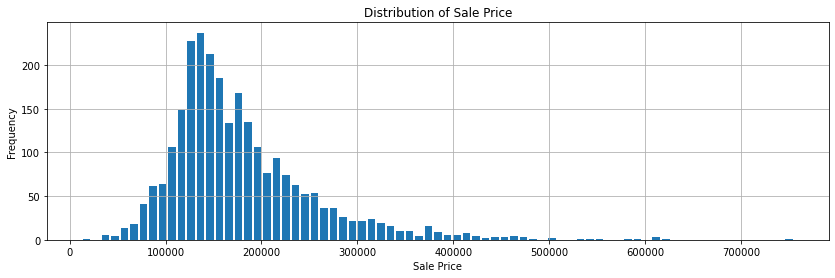

<IPython.core.display.Javascript object>

In [40]:
# Looking at the sale price. Skewed to the left with a long right taill and an outlier of a sale price over 700k

# Calculate the summary statistics of sales price
sales_price_stats = housing_no_na["SalePrice"].describe()

# Print the summary statistics of sales price
print("Summary Statistics of Sale Price:")
print(sales_price_stats)

# Plot the histogram of sales price
housing_no_na["SalePrice"].hist(bins=75, rwidth=0.8, figsize=(14, 4))
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

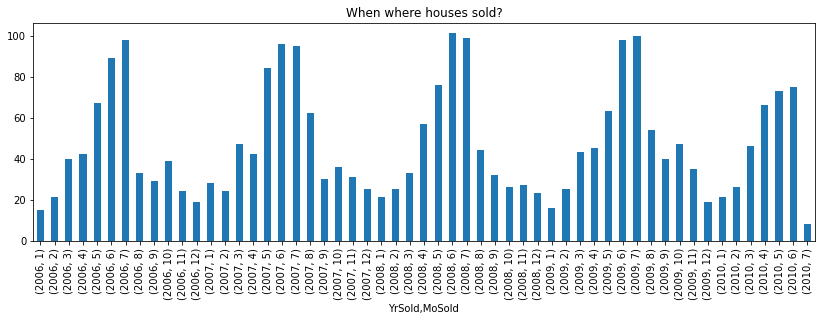

<IPython.core.display.Javascript object>

In [43]:
# Plot the number of houses sold by year and month
# Definitely looks like there is seasonality which would have to be looked into further.
housing_no_na.groupby(["YrSold", "MoSold"]).PID.count().plot(
    kind="bar", figsize=(14, 4)
)
plt.title("When houses were sold")
plt.show()

Summary Statistics of GrLivArea:
count    2580.000000
mean     1486.039922
std       488.650181
min       334.000000
25%      1112.000000
50%      1436.000000
75%      1733.000000
max      4676.000000
Name: GrLivArea, dtype: float64


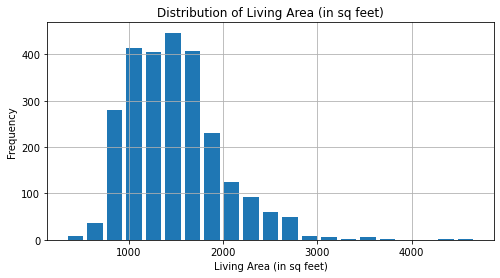

<IPython.core.display.Javascript object>

In [44]:
# looking at the size of the houses sold.  Distribution has a long right tail
# Calculate the summary statistics of GrLivArea
gr_liv_area_stats = housing_no_na["GrLivArea"].describe()

# Print the summary statistics of GrLivArea
print("Summary Statistics of GrLivArea:")
print(gr_liv_area_stats)

# Plot the histogram of GrLivArea
housing_no_na["GrLivArea"].hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('Distribution of Living Area (in sq feet)')
plt.xlabel('Living Area (in sq feet)')
plt.ylabel('Frequency')
plt.show()


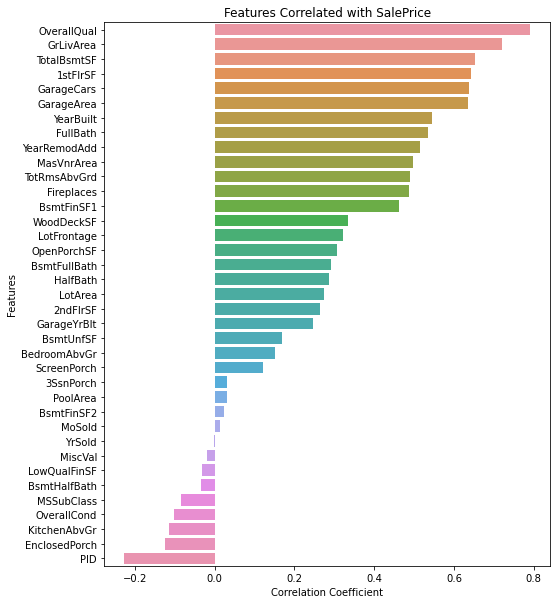

<IPython.core.display.Javascript object>

In [45]:
# strong correlation with a few features. Looks like SF might be better to combine in to total SF

# Calculate the correlation matrix
corr = housing_no_na.corr()

# Sort the features by correlation to SalePrice from positive to negative
corr_sorted = corr.sort_values("SalePrice", ascending=False)

# Plot the features sorted by correlation to SalePrice
plt.figure(figsize=(8, 10))
sns.barplot(x=corr_sorted["SalePrice"][1:], y=corr_sorted.index[1:], orient="h")
plt.title("Features Correlated with SalePrice")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

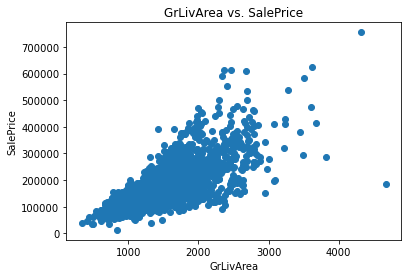

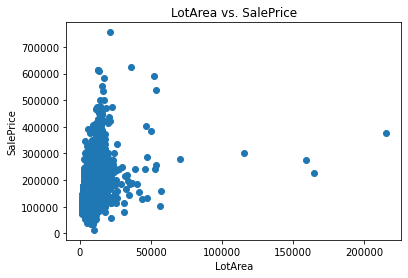

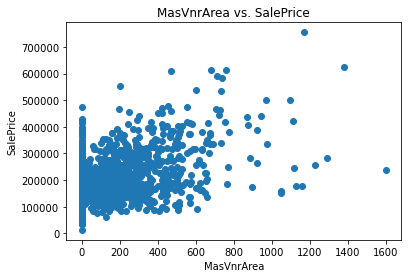

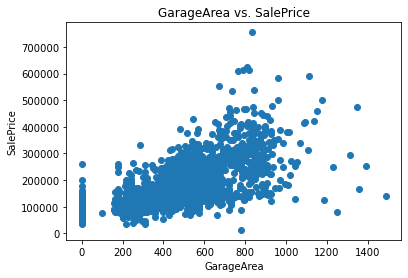

<IPython.core.display.Javascript object>

In [6]:
# taking a look at how the Area features relate to SalePrice

for column in housing_cleaned.columns:
    if "Area" in column:
        plt.scatter(housing_cleaned[column], housing_cleaned["SalePrice"])
        plt.title(f"{column} vs. SalePrice")
        plt.xlabel(column)
        plt.ylabel("SalePrice")
        plt.show()


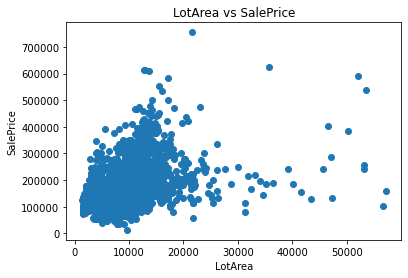

<IPython.core.display.Javascript object>

In [27]:
# after removing outliers it seems that lot area has less of an effect than expected

# Filter the DataFrame to remove the outliers
df_filtered = housing_cleaned[housing_cleaned['LotArea'] <= 60000]

# Plot the scatterplot of LotArea vs SalePrice
plt.scatter(df_filtered['LotArea'], df_filtered['SalePrice'])
plt.title('LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()


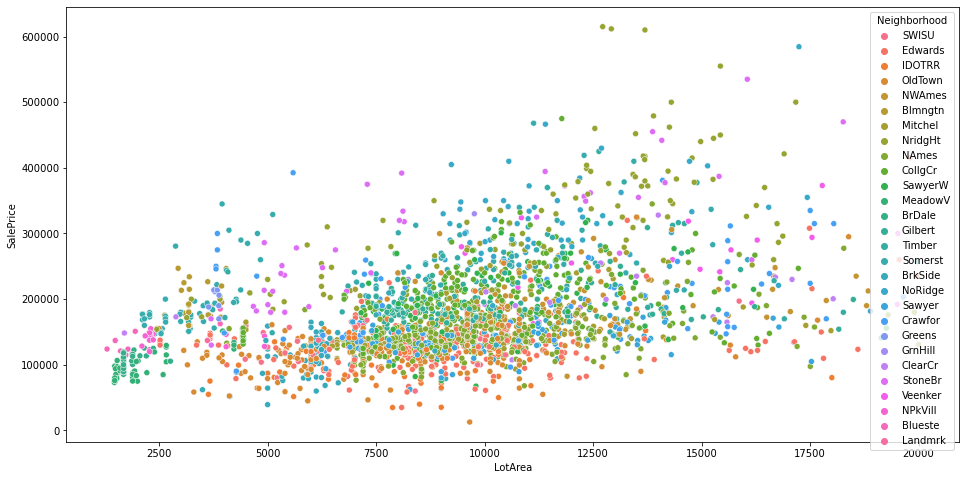

<IPython.core.display.Javascript object>

In [28]:
# when factoring in the neighborhood it looks like there is more of a relationship with lot area and sale price

# Filter out outliers with LotArea above 20000 to zoom in on the gaph
filtered = housing_cleaned[housing_cleaned['LotArea'] <= 20000]

# Create a scatterplot of LotArea vs SalePrice, colored by Neighborhood
plt.figure(figsize=(16, 8))
sns.scatterplot(data=filtered, x='LotArea', y='SalePrice', hue='Neighborhood')
plt.show()


In [17]:
# Taking a closer look at the neighborhoods
neighborhood_stats = housing_cleaned.groupby('Neighborhood')['SalePrice'].agg(['count', 'max', 'min', 'mean']).round(0)

print('\nStats for each neighborhood:')
print(neighborhood_stats.sort_values(by='mean', ascending=False))



Stats for each neighborhood:
              count     max     min      mean
Neighborhood                                 
NoRidge          67  755000  190000  326114.0
NridgHt         121  615000  154000  313662.0
StoneBr          43  591587  130000  305308.0
GrnHill           2  330000  230000  280000.0
Veenker          23  385000  150000  251263.0
Timber           54  425000  150000  242850.0
Somerst         143  468000  139000  228762.0
ClearCr          40  328000  107500  213958.0
Crawfor          93  392500   90350  201942.0
CollgCr         236  475000  110000  198104.0
Blmngtn          23  246990  159895  196237.0
Greens            8  214000  155000  193531.0
NWAmes          123  306000   82500  190330.0
Gilbert         143  377500  114250  189402.0
SawyerW         113  320000   67500  188075.0
Mitchel         104  300000   81500  162602.0
NAmes           410  345000   68000  144960.0
Blueste          10  200000  115000  143590.0
NPkVill          22  155000  120000  140743.0
Sawy

<IPython.core.display.Javascript object>

In [6]:
locations = pd.read_csv("data/locations.csv", index_col=0)
locations

SalePrice Neighborhood                       Prop_Addr   latitude  \
PID                                                                            
909176150     126000        SWISU      436 HAYWARD AVE, AMES, USA  42.018564   
905476230     139500      Edwards         3416 WEST ST, AMES, USA  42.024855   
905476230     139500      Edwards         3416 WEST ST, AMES, USA  42.024855   
911128020     124900       IDOTRR         320 S 2ND ST, AMES, USA  42.021548   
535377150     114000      OldTown     1524 DOUGLAS AVE, AMES, USA  42.037391   
...              ...          ...                             ...        ...   
903205040     121000      BrkSide   1021 RIDGEWOOD AVE, AMES, USA  42.032102   
905402060     139600      Edwards        3619 MARY CIR, AMES, USA  42.027669   
909275030     145000      Crawfor  2140 SUNSET DR 2142, AMES, USA  42.020129   
907192040     217500      CollgCr    5319 CLEMENS BLVD, AMES, USA  42.016802   
906223180     215000      SawyerW      1025 VERMONT CT, AMES, USA  42.030997   

           longitude    street_name        Neighborhood_st  
PID                                                         
909176150 -93.651619    HAYWARD_AVE      SWISU_HAYWARD_AVE  
905476230 -93.663671        WEST_ST        Edwards_WEST_ST  
905476230 -93.663671        WEST_ST        Edwards_WEST_ST  
911128020 -93.614068       S_2ND_ST        IDOTRR_S_2ND_ST  
535377150 -93.612207    DOUGLAS_AVE    OldTown_DOUGLAS_AVE  
...              ...            ...                    ...  
903205040 -93.626373  RIDGEWOOD_AVE  BrkSide_RIDGEWOOD_AVE  
905402060 -93.666138       MARY_CIR       Edwards_MARY_CIR  
909275030 -93.643832      SUNSET_DR      Crawfor_SUNSET_DR  
907192040 -93.689748   CLEMENS_BLVD   CollgCr_CLEMENS_BLVD  
906223180 -93.682220     VERMONT_CT     SawyerW_VERMONT_CT  

[2604 rows x 7 columns]

<IPython.core.display.Javascript object>

In [7]:
# Taking a closer look at the neighborhoods
neighborhood_lot = housing_cleaned.groupby('Neighborhood')['LotArea'].agg(['count', 'max', 'min', 'mean']).round(0)

print('\nStats for each neighborhood:')
print(neighborhood_lot.sort_values(by='mean', ascending=False))



Stats for each neighborhood:
              count     max   min     mean
Neighborhood                              
ClearCr          40  159000  1700  26094.0
Timber           54  215245  4054  19683.0
Veenker          23   50271  9466  15738.0
NoRidge          67   46589  9044  12971.0
Mitchel         104   43500  4500  11985.0
Crawfor          93   26073  3811  11740.0
NWAmes          123   20781  8000  11730.0
Gilbert         143   47280  7250  11288.0
NridgHt         121   20431  2268  11004.0
StoneBr          43   53504  3696  10843.0
SawyerW         113   26400  7018  10367.0
Sawyer          139   25339  4280  10289.0
Edwards         165   47007  2522  10079.0
CollgCr         236   21533  4426  10017.0
NAmes           410   31770  4058   9937.0
GrnHill           2    9763  8239   9001.0
IDOTRR           76   56600  3636   8790.0
OldTown         213   33120  2500   8366.0
SWISU            42   15863  4484   7598.0
Somerst         143   20896  2117   7323.0
BrkSide         103   21

<IPython.core.display.Javascript object>

In [31]:
# Group the data by neighborhood
grouped = housing_cleaned.groupby('Neighborhood')

# Iterate over each group
for name, group in grouped:
    # Exclude features that have "area" in the feature name and SalePrice or PID
    features = [col for col in group.columns if 'Area' not in col and 'SF' not in col and col != 'SalePrice' and col != 'PID']

#     features = [col for col in group.columns if 'Area' not in col and col != 'SalePrice' and col != 'PID']
    # Calculate the correlation coefficients between sale price and each feature
    correlations = group[features].corrwith(group['SalePrice'])
    # Get the absolute values of the correlation coefficients and sort in descending order
    correlations = correlations.abs().sort_values(ascending=False)
    # Print the name of the most important feature for predicting sale price in this neighborhood
    print(f'Most important feature for {name}: {correlations.index[0]}')


Most important feature for Blmngtn: BsmtFullBath
Most important feature for Blueste: LotFrontage
Most important feature for BrDale: TotRmsAbvGrd
Most important feature for BrkSide: OverallQual
Most important feature for ClearCr: OverallQual
Most important feature for CollgCr: OverallQual
Most important feature for Crawfor: OverallQual
Most important feature for Edwards: Fireplaces
Most important feature for Gilbert: GarageCars
Most important feature for Greens: TotRmsAbvGrd
Most important feature for GrnHill: YearBuilt
Most important feature for IDOTRR: OverallQual
Most important feature for Landmrk: MSSubClass
Most important feature for MeadowV: OverallQual
Most important feature for Mitchel: OverallQual
Most important feature for NAmes: OverallQual
Most important feature for NPkVill: MSSubClass
Most important feature for NWAmes: TotRmsAbvGrd
Most important feature for NoRidge: FullBath
Most important feature for NridgHt: OverallQual
Most important feature for OldTown: OverallQual
Mos

/Users/jasonphillip/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/jasonphillip/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


<IPython.core.display.Javascript object>

In [32]:
locations = pd.read_csv("data/locations.csv", index_col=0)


<IPython.core.display.Javascript object>

In [7]:
import folium
import branca
from folium.plugins import MarkerCluster


# Calculate six equally spaced intervals for sale prices
sale_price_min = locations['SalePrice'].min()
sale_price_max = locations['SalePrice'].max()
interval = (sale_price_max - sale_price_min) / 10
levels = [sale_price_min + interval * i for i in range(10)]
colors = branca.colormap.LinearColormap(['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'pink', 'brown', 'gray'],
                                        vmin=sale_price_min, vmax=sale_price_max)


# create map centered on Ames, Iowa
m = folium.Map(location=[42.0308, -93.6319], zoom_start=12)

# create a feature group for the locations
fg = folium.FeatureGroup(name='Locations')

# loop through the locations dataframe and add a circle marker for each location
for i, row in locations.iterrows():
    lat, lon = row['latitude'], row['longitude']
    sale_price = row['SalePrice']
    for j in range(len(levels) - 1):
        if levels[j] <= sale_price < levels[j + 1]:
            color = colors(sale_price)
            break
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=color,
        fill_color=color,
        fill_opacity=0.7,
        popup=f'Sale Price: ${sale_price}',
    ).add_to(fg)

# add the feature group to the map
fg.add_to(m)

# add a layer control to the map
folium.LayerControl().add_to(m)

# # create the legend
legend = colors.caption = 'Sale Price'
for i in range(len(levels) - 1):
    legend += f'<br>{levels[i]:.2f} - {levels[i+1]:.2f}: <span style="color:{colors(levels[i])}">●</span>'
    
# # add the legend to the map
m.get_root().html.add_child(folium.Element(legend))


# display the map
m


<IPython.core.display.Javascript object>

In [34]:
# Looking at the map of sale prices, there is a clear correlation between neighborhoods and the sale price.
# However, within neighborhoods, there is also a clear segmentation of sale prices based on the location
# within that neighborhood. For example, houses located across from a park have a higher sale price,
# whereas houses that face a cemetery have a lower sale price.  At first, I was going to use the longitude
# and latitude to check the proximity to something like a park; however, there is a much simpler way that
# should be more effective. I can examine how the street within a neighborhood affects the sale price.
# This should show the correlation of the sale price with the surrounding features, such as airports,
# parks, golf courses, living on a high-traffic road such as a highway, and cul-de-sacs.

<IPython.core.display.Javascript object>

In [35]:
locations

PID  SalePrice Neighborhood                       Prop_Addr  \
0     909176150     126000        SWISU      436 HAYWARD AVE, AMES, USA   
1     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
2     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
3     911128020     124900       IDOTRR         320 S 2ND ST, AMES, USA   
4     535377150     114000      OldTown     1524 DOUGLAS AVE, AMES, USA   
...         ...        ...          ...                             ...   
2599  903205040     121000      BrkSide   1021 RIDGEWOOD AVE, AMES, USA   
2600  905402060     139600      Edwards        3619 MARY CIR, AMES, USA   
2601  909275030     145000      Crawfor  2140 SUNSET DR 2142, AMES, USA   
2602  907192040     217500      CollgCr    5319 CLEMENS BLVD, AMES, USA   
2603  906223180     215000      SawyerW      1025 VERMONT CT, AMES, USA   

       latitude  longitude  
0     42.018564 -93.651619  
1     42.024855 -93.663671  
2     42.024855 -93.663671  
3     42.021548 -93.614068  
4     42.037391 -93.612207  
...         ...        ...  
2599  42.032102 -93.626373  
2600  42.027669 -93.666138  
2601  42.020129 -93.643832  
2602  42.016802 -93.689748  
2603  42.030997 -93.682220  

[2604 rows x 6 columns]

<IPython.core.display.Javascript object>

In [36]:
def get_street_name(address):
    # This function extracts the street name from the address
    # The street name should be everything after the first number in the string that is not a space.
    # The street name should also continue up until the comma.
    # If there are any spaces in the street name, they should be replaced with underscores.
    parts = address.split(',')
    if len(parts) > 0:
        street = parts[0].split(' ', 1)[-1].replace(' ', '_')
        return street
    else:
        return ''

# Apply the get_street_name function to the Prop_Addr column
locations['street_name'] = locations['Prop_Addr'].apply(get_street_name)

# Combine the Neighborhood and street_name columns to create the Neighborhood_st column
locations['Neighborhood_st'] = locations['Neighborhood'] + '_' + locations['street_name']



<IPython.core.display.Javascript object>

In [94]:
# Extract the street type from the Neighborhood_st column
locations['street_type'] = locations['Neighborhood_st'].str.split('_').str[-1]

# Replace "GLEN" with "GLEN ST" in the Prop_Addr column
locations['Prop_Addr'] = locations['Prop_Addr'].str.replace('GLEN', 'GLEN ST')

# Replace "FOREST_GLEN" with "FOREST_GLEN_ST" in the street_name column
locations['street_name'] = locations['street_name'].str.replace('FOREST_GLEN', 'FOREST_GLEN_ST')

# Replace "GLEN" with "ST" in the street_type column
locations['street_type'] = locations['street_type'].str.replace('GLEN', 'ST')

# Remove " 1/2" from "CLARK AVE 709 1/2" in the Prop_Addr column
locations['Prop_Addr'] = locations['Prop_Addr'].str.replace(' 709 1/2', '')

# Replace "1/2" with "AVE" in the street_type column
locations['street_type'] = locations['street_type'].str.replace('1/2', 'AVE')

# Replace "OldTown_CLARK_AVE_709_1/2" with "OldTown_CLARK_AVE" in the Neighborhood_st column
locations['Neighborhood_st'] = locations['Neighborhood_st'].str.replace('OldTown_CLARK_AVE_709_1/2', 'OldTown_CLARK_AVE')

# Replace "CLARK_AVE_709_1/2" with "AVE" in the street_name column
locations['street_name'] = locations['street_name'].str.replace('CLARK_AVE_709_1/2', 'CLARK_AVE')



<IPython.core.display.Javascript object>

In [95]:
locations

PID  SalePrice Neighborhood                       Prop_Addr  \
0     909176150     126000        SWISU      436 HAYWARD AVE, AMES, USA   
1     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
2     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
3     911128020     124900       IDOTRR         320 S 2ND ST, AMES, USA   
4     535377150     114000      OldTown     1524 DOUGLAS AVE, AMES, USA   
...         ...        ...          ...                             ...   
2599  903205040     121000      BrkSide   1021 RIDGEWOOD AVE, AMES, USA   
2600  905402060     139600      Edwards        3619 MARY CIR, AMES, USA   
2601  909275030     145000      Crawfor  2140 SUNSET DR 2142, AMES, USA   
2602  907192040     217500      CollgCr    5319 CLEMENS BLVD, AMES, USA   
2603  906223180     215000      SawyerW      1025 VERMONT CT, AMES, USA   

       latitude  longitude    street_name        Neighborhood_st street_type  
0     42.018564 -93.651619    HAYWARD_AVE      SWISU_HAYWARD_AVE         AVE  
1     42.024855 -93.663671        WEST_ST        Edwards_WEST_ST          ST  
2     42.024855 -93.663671        WEST_ST        Edwards_WEST_ST          ST  
3     42.021548 -93.614068       S_2ND_ST        IDOTRR_S_2ND_ST          ST  
4     42.037391 -93.612207    DOUGLAS_AVE    OldTown_DOUGLAS_AVE         AVE  
...         ...        ...            ...                    ...         ...  
2599  42.032102 -93.626373  RIDGEWOOD_AVE  BrkSide_RIDGEWOOD_AVE         AVE  
2600  42.027669 -93.666138       MARY_CIR       Edwards_MARY_CIR         CIR  
2601  42.020129 -93.643832      SUNSET_DR      Crawfor_SUNSET_DR          DR  
2602  42.016802 -93.689748   CLEMENS_BLVD   CollgCr_CLEMENS_BLVD        BLVD  
2603  42.030997 -93.682220     VERMONT_CT     SawyerW_VERMONT_CT          CT  

[2604 rows x 9 columns]

<IPython.core.display.Javascript object>

In [8]:
locations[locations["street_type"].str.contains("GLEN")]

Empty DataFrame
Columns: [SalePrice, Neighborhood, Prop_Addr, latitude, longitude, street_name, Neighborhood_st, street_type]
Index: []

<IPython.core.display.Javascript object>

In [12]:
locations["street_type"].value_counts()


AVE     882
DR      635
ST      519
RD      202
CIR     149
CT       77
BLVD     50
PL       33
LN       19
WAY      15
EAST      8
UNIT      7
PKWY      4
GLEN      3
1/2       1
Name: street_type, dtype: int64

<IPython.core.display.Javascript object>

In [38]:
locations["street_name"].value_counts()

CLARK_AVE           37
DUFF_AVE            28
CLEMENS_BLVD        28
EISENHOWER_AVE      28
NORTHWESTERN_AVE    27
                    ..
BROOKDALE_CIR        1
WELLONS_DR_202       1
ARTHUR_CIR           1
CRESCENT_ST          1
SUNSET_DR_2142       1
Name: street_name, Length: 503, dtype: int64

<IPython.core.display.Javascript object>

In [39]:
locations["Neighborhood_st"].value_counts()

CollgCr_CLEMENS_BLVD                   28
Gilbert_WELBECK_DR                     25
NAmes_CLARK_AVE                        22
BrkSide_RIDGEWOOD_AVE                  21
NridgHt_HARRISON_RD                    20
                                       ..
NAmes_LUTHER_DR_2732                    1
NWAmes_TAFT_AVE                         1
Edwards_COLORADO_AVE_110                1
Blueste_LITTLE_BLUESTEM_CT_UNIT_107     1
Crawfor_SUNSET_DR_2142                  1
Name: Neighborhood_st, Length: 561, dtype: int64

<IPython.core.display.Javascript object>

In [40]:
# looks like some numbers carried over so im removing these
import re


def remove_number(string):
    # This function removes the number and the preceding underscore from a string that ends with a number
    match = re.search(r"_(\d+)$", string)
    if match:
        number = match.group(1)
        return string[: -len(number) - 1]
    else:
        return string


# Apply the remove_number function to the Neighborhood_st column
locations["Neighborhood_st"] = locations["Neighborhood_st"].apply(remove_number)
locations["street_name"] = locations["street_name"].apply(remove_number)

<IPython.core.display.Javascript object>

In [41]:
locations["Neighborhood_st"].value_counts()

CollgCr_CLEMENS_BLVD     28
Gilbert_WELBECK_DR       25
BrkSide_RIDGEWOOD_AVE    22
NAmes_CLARK_AVE          22
NridgHt_HARRISON_RD      20
                         ..
Timber_RED_OAK_DR         1
NoRidge_BALSAM_CIR        1
NAmes_HUNZIKER_CIR        1
IDOTRR_N_4TH_ST           1
NoRidge_HEMLOCK_CIR       1
Name: Neighborhood_st, Length: 504, dtype: int64

<IPython.core.display.Javascript object>

In [42]:
# new idea- break up the neighborhoods into smaller subsets where the street name is near a feature that changes
# the sale price.  so if we have a williamsburg neighborhood and kent ave with a view of manhattan
# had an increased value we would now have two neighborhoods.  williamsburg and williamsburg kent


<IPython.core.display.Javascript object>

In [43]:
# group by neighborhood and look at the min max mean and number of properties for each street

<IPython.core.display.Javascript object>

In [44]:
import pandas as pd

# group by neighborhood and street
grouped = locations.groupby(['Neighborhood', 'street_name'])

# calculate count, mean, min, and max of SalePrice for each group
result = grouped.agg({'SalePrice': ['count', 'mean', 'min', 'max']})

# flatten the resulting column names
result.columns = ['_'.join(col).strip() for col in result.columns.values]

# reset the index to make Neighborhood and street_name columns
result = result.reset_index()

# convert SalePrice_mean to float
result['SalePrice_mean'] = result['SalePrice_mean'].astype(int)


# view the results
result


Neighborhood              street_name  SalePrice_count  SalePrice_mean  \
0        Blmngtn             BRICKMAN_AVE                3          166698   
1        Blmngtn              LAKESIDE_DR                5          213448   
2        Blmngtn              WESTWIND_DR               15          196408   
3        Blueste       LITTLE_BLUESTEM_CT                3          182500   
4        Blueste  LITTLE_BLUESTEM_CT_UNIT                7          126914   
..           ...                      ...              ...             ...   
499      Veenker            GREENSBORO_DR                2          241875   
500      Veenker               KINGMAN_RD                5          308800   
501      Veenker            PINEHURST_CIR                3          203833   
502      Veenker         TORREY_PINES_CIR                1          218000   
503      Veenker          TORREY_PINES_RD                3          203366   

     SalePrice_min  SalePrice_max  
0           159895         180000  
1           185485         246578  
2           160000         246990  
3           162500         200000  
4           115000         151000  
..             ...            ...  
499         165000         318750  
500         192000         385000  
501         162500         255000  
502         218000         218000  
503         181500         241600  

[504 rows x 6 columns]

<IPython.core.display.Javascript object>

In [45]:
result.to_csv("result.csv", index=False)

<IPython.core.display.Javascript object>

In [46]:
counts = locations["street_name"].value_counts()

<IPython.core.display.Javascript object>

In [47]:
counts[counts > 2].sum()

2380

<IPython.core.display.Javascript object>

In [48]:
counts[counts > 10]


CLARK_AVE           37
CARROLL_AVE         29
CLEMENS_BLVD        28
EISENHOWER_AVE      28
NORTHWESTERN_AVE    28
DUFF_AVE            28
BURNETT_AVE         28
KELLOGG_AVE         27
MAXWELL_AVE         25
WELBECK_DR          25
ROSS_RD             23
DOUGLAS_AVE         23
RIDGEWOOD_AVE       22
GRAND_AVE           20
HARRISON_RD         20
ROOSEVELT_AVE       20
WILSON_AVE          19
BRISTOL_DR          19
HEMINGWAY_DR        19
MARSTON_AVE         19
KANSAS_DR           18
ARIZONA_AVE         18
TORONTO_ST          17
ONTARIO_ST          17
JOHNSON_ST          16
SCHUBERT_ST         16
POE_AVE             15
STAFFORD_AVE        15
ASPEN_RD            15
16TH_ST             15
CURTISS_AVE         15
CLAYTON_DR          15
WESTWIND_DR         15
KINGSTON_DR         15
MELROSE_AVE         15
OAKLAND_ST          14
24TH_ST             14
MARIGOLD_DR         14
LINCOLN_WAY         14
WESTLAWN_DR         14
STONE_BROOKE_RD     14
TRUMAN_PL           14
MEADOW_PL           14
TOP_O_HOLLO

<IPython.core.display.Javascript object>

In [ ]:

# Filter out outliers with LotArea above 20000 to zoom in on the gaph
filtered = result[result['Neighborhood'] == 'Veenker']

# Create a scatterplot of LotArea vs SalePrice, colored by Neighborhood
plt.figure(figsize=(16, 8))
sns.scatterplot(data=filtered, x='LotArea', y='SalePrice', hue='Neighborhood')
plt.show()

In [14]:
filtered

Neighborhood       street_name  SalePrice_count  SalePrice_mean  \
497      Veenker        AMHERST_DR                4          243750   
498      Veenker    GREENSBORO_CIR                5          267340   
499      Veenker     GREENSBORO_DR                2          241875   
500      Veenker        KINGMAN_RD                5          308800   
501      Veenker     PINEHURST_CIR                3          203833   
502      Veenker  TORREY_PINES_CIR                1          218000   
503      Veenker   TORREY_PINES_RD                3          203366   

     SalePrice_min  SalePrice_max  
497         150000         290000  
498         217500         324000  
499         165000         318750  
500         192000         385000  
501         162500         255000  
502         218000         218000  
503         181500         241600

<IPython.core.display.Javascript object>

In [ ]:
housing = pd.read_csv("../data/housing_no_na.csv", index_col=0)

In [90]:
# saving updated locations file
locations.to_csv("data/locations.csv", index=False)

<IPython.core.display.Javascript object>

In [52]:
housing_cleaned.columns.sort()

<bound method Index.sort of Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'Garag

<IPython.core.display.Javascript object>

In [46]:
housing_cleaned

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
0     909176150        856     126000          30       RL    56.246899   
1     905476230       1049     139500         120       RL    42.000000   
2     911128020       1001     124900          30  C (all)    60.000000   
3     535377150       1039     114000          70       RL    80.000000   
4     534177230       1665     227000          60       RL    70.000000   
...         ...        ...        ...         ...      ...          ...   
2575  903205040        952     121000          30       RL    56.246899   
2576  905402060       1733     139600          20       RL    56.246899   
2577  909275030       2002     145000          90       RH    82.000000   
2578  907192040       1842     217500          60       RL    56.246899   
2579  906223180       1911     215000          60       RL    80.000000   

      LotArea Street     Alley LotShape LandContour Utilities LotConfig  \
0        7890   Pave  No_Alley      Reg         Lvl    AllPub    Corner   
1        4235   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
2        6060   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
3        8146   Pave  No_Alley      Reg         Lvl    AllPub    Corner   
4        8400   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
...       ...    ...       ...      ...         ...       ...       ...   
2575     8854   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
2576    13680   Pave  No_Alley      IR1         Lvl    AllPub   CulDSac   
2577     6270   Pave  No_Alley      Reg         HLS    AllPub    Inside   
2578     8826   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
2579     9554   Pave  No_Alley      IR1         Lvl    AllPub    Inside   

     LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0          Gtl        SWISU       Norm       Norm     1Fam     1Story   
1          Gtl      Edwards       Norm       Norm   TwnhsE     1Story   
2          Gtl       IDOTRR       Norm       Norm     1Fam     1Story   
3          Gtl      OldTown       Norm       Norm     1Fam     2Story   
4          Gtl       NWAmes       Norm       Norm     1Fam     2Story   
...        ...          ...        ...        ...      ...        ...   
2575       Gtl      BrkSide       Norm       Norm     1Fam     1.5Unf   
2576       Gtl      Edwards       Norm       Norm     1Fam     1Story   
2577       Gtl      Crawfor       Norm       Norm   Duplex     2Story   
2578       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
2579       Gtl      SawyerW       Norm       Norm     1Fam     2Story   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0               6            6       1939          1950     Gable  CompShg   
1               5            5       1984          1984     Gable  CompShg   
2               5            9       1930          2007       Hip  CompShg   
3               4            8       1900          2003     Gable  CompShg   
4               8            6       2001          2001     Gable  CompShg   
...           ...          ...        ...           ...       ...      ...   
2575            6            6       1916          1950     Gable  CompShg   
2576            3            5       1955          1955       Hip  CompShg   
2577            5            6       1949          1950     Gable  CompShg   
2578            7            5       2000          2000     Gable  CompShg   
2579            8            5       1993          1994     Gable  CompShg   

     Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0        Wd Sdng     Wd Sdng       None         0.0        TA        TA   
1        HdBoard     HdBoard    BrkFace       149.0        Gd        TA   
2        MetalSd     MetalSd       None         0.0        Gd        TA   
3        MetalSd     MetalSd       None         0.0        Gd        Gd   
4        VinylSd     

<IPython.core.display.Javascript object>

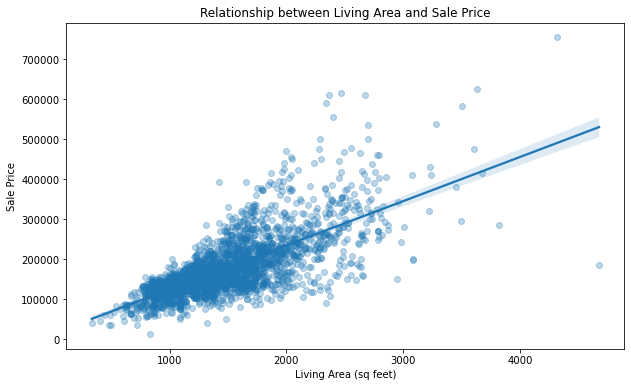

<IPython.core.display.Javascript object>

In [47]:
# Looking at outliers

# Plot the regression between GrLivArea and SalePrice
plt.figure(figsize=(10,6))
sns.regplot(x=housing_cleaned['GrLivArea'], y=housing_cleaned['SalePrice'], scatter_kws={'alpha':0.3})
plt.title('Relationship between Living Area and Sale Price')
plt.xlabel('Grand Living Area (sq feet)')
plt.ylabel('Sale Price')
plt.show()

In [48]:
housing_cleaned[housing_cleaned["GrLivArea"] > 4000]



PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
309   908154205       4676     184750          60       RL        130.0   
1007  528351010       4316     755000          60       RL        104.0   

      LotArea Street     Alley LotShape LandContour Utilities LotConfig  \
309     40094   Pave  No_Alley      IR1         Bnk    AllPub    Inside   
1007    21535   Pave  No_Alley      IR1         Lvl    AllPub    Corner   

     LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
309        Gtl      Edwards       PosN       PosN     1Fam     2Story   
1007       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
309            10            5       2007          2008       Hip  CompShg   
1007           10            6       1994          1995     Gable  WdShngl   

     Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
309      CemntBd     CmentBd      Stone       762.0        Ex        TA   
1007     HdBoard     HdBoard    BrkFace      1170.0        Ex        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
309       PConc       Ex       TA           Gd          GLQ      2260.0   
1007      PConc       Ex       TA           Gd          GLQ      1455.0   

     BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
309           Unf         0.0      878.0       3138.0    GasA        Ex   
1007          Unf         0.0      989.0       2444.0    GasA        Ex   

     CentralAir Electrical  1stFlrSF  2ndFlrSF  BsmtFullBath  BsmtHalfBath  \
309           Y      SBrkr      3138      1538           1.0           0.0   
1007          Y      SBrkr      2444      1872           0.0           1.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
309          3         1             3             1          Ex   
1007         3         1             4             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
309             11        Typ           1          Gd    BuiltIn       2007.0   
1007            10        Typ           2          Ex     Attchd       1994.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
309           Fin         3.0       884.0         TA         TA          Y   
1007          Fin         3.0       832.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch   PoolQC     Fence  \
309          208          406              0            0  No_Pool  No_Fence   
1007         382           50              0            0  No_Pool  No_Fence   

      MoSold  YrSold SaleType SaleCondition  
309       10    2007      New       Partial  
1007       1    2007      WD         Normal

<IPython.core.display.Javascript object>

In [49]:
# dropping the two outliers

# Drop the observations with GrLivArea > 4000
housing_cleaned = housing_cleaned[housing_cleaned["GrLivArea"] <= 4000]

# Save the cleaned dataset
housing_cleaned.to_csv("housing_cleaned.csv", index=False)


<IPython.core.display.Javascript object>

In [66]:
# Adding to more features to take into account the time since house was built or remodeled 
# in relation to the year it was sold. 
housing_cleaned['Age'] = housing_cleaned['YrSold'] - housing_cleaned['YearBuilt']
housing_cleaned['RemodAge'] = housing_cleaned['YrSold'] - housing_cleaned['YearRemodAdd']


<IPython.core.display.Javascript object>

array([[<AxesSubplot:title={'center':'PID'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>],
       [<AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'}>

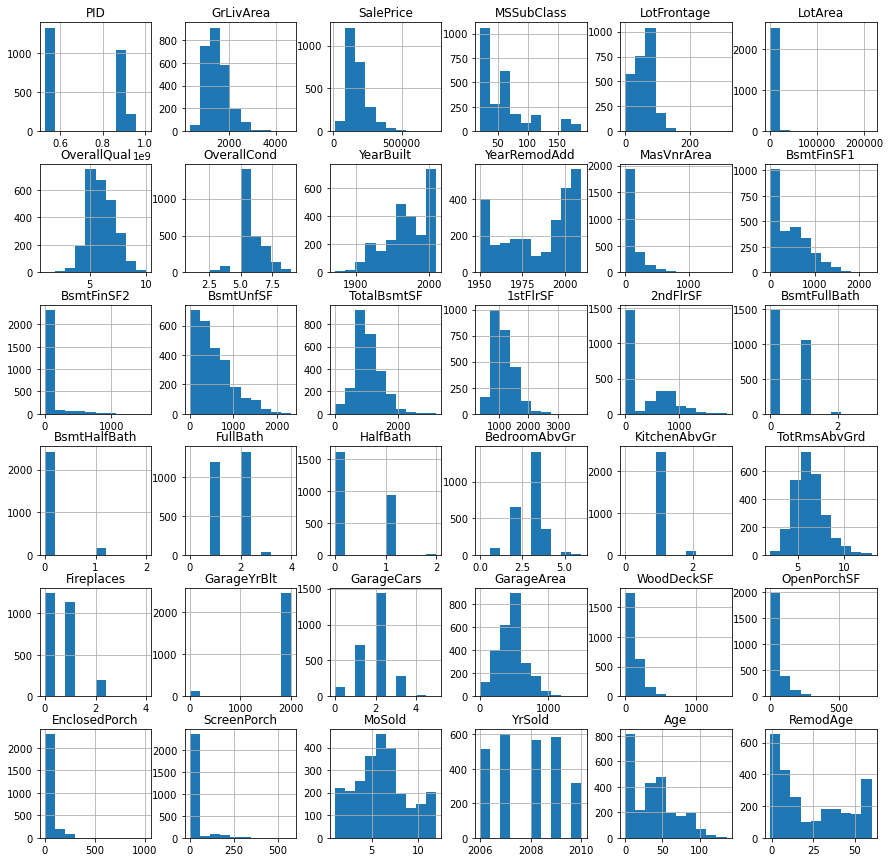

<IPython.core.display.Javascript object>

In [67]:
# taking a look at the numeric features
numeric_features = housing_cleaned.select_dtypes(include=[np.number])
numeric_features.hist(figsize=(15, 15))

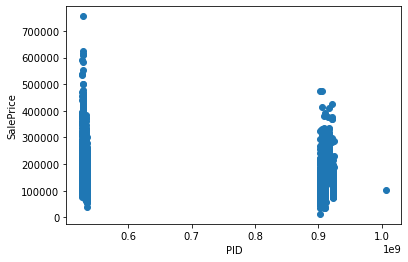

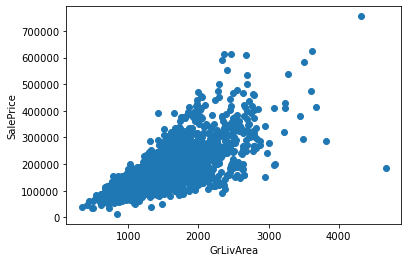

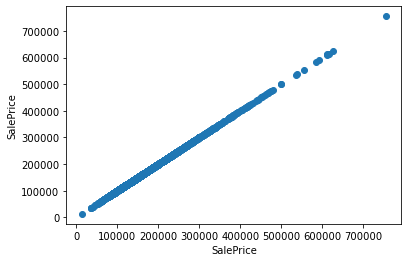

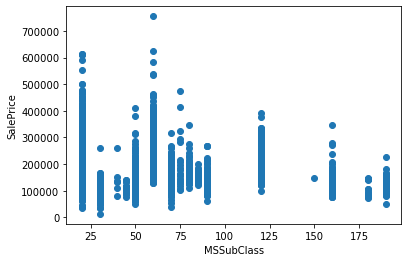

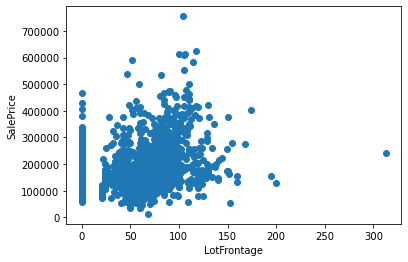

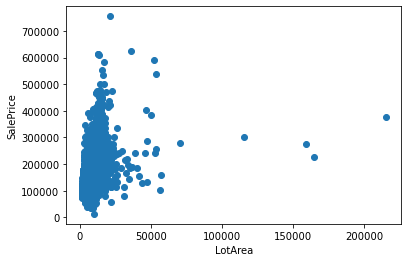

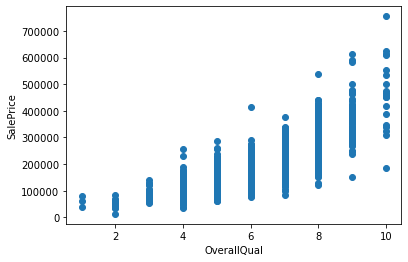

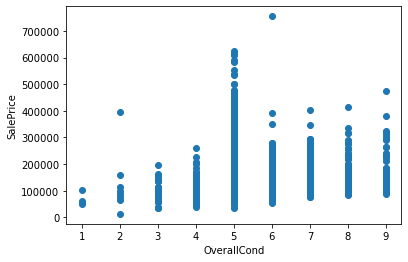

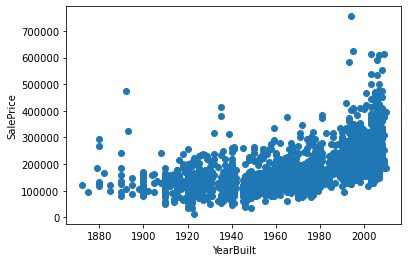

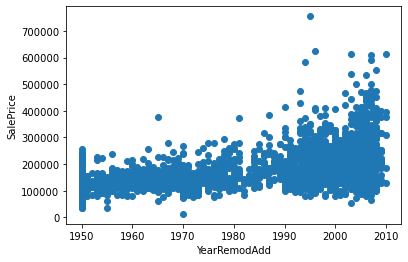

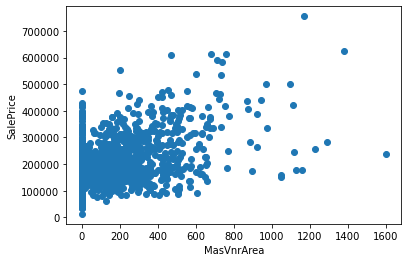

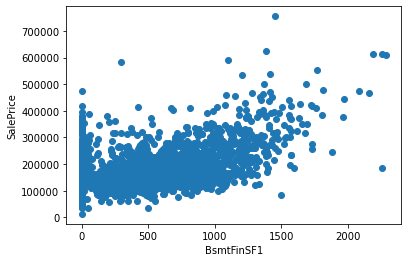

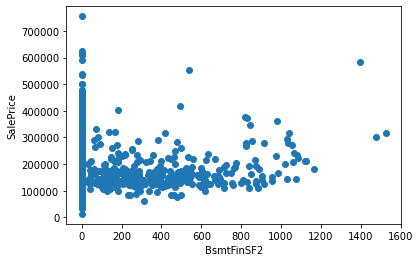

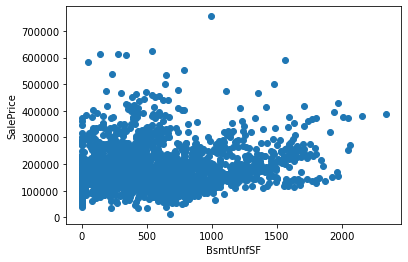

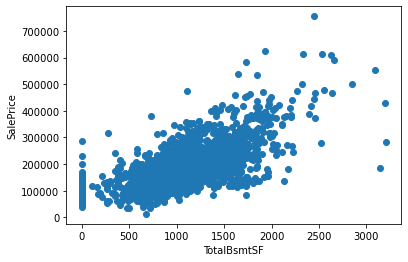

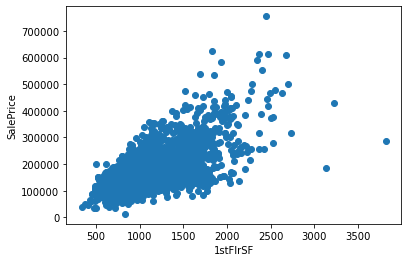

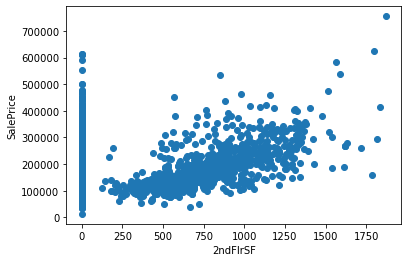

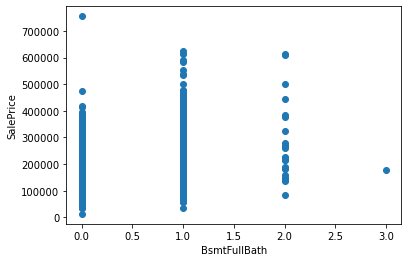

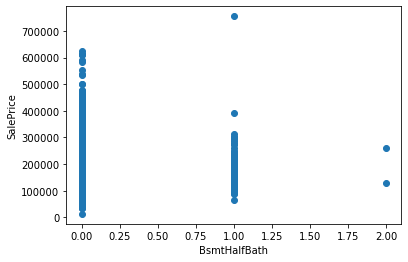

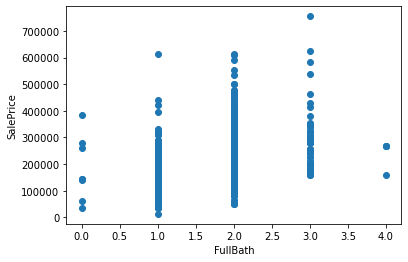

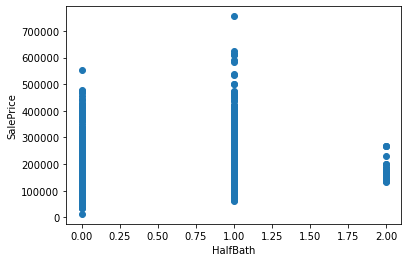

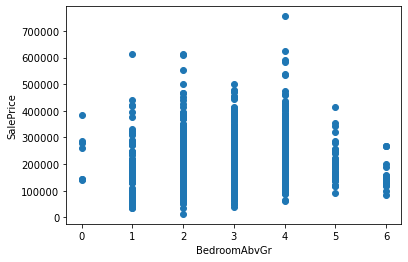

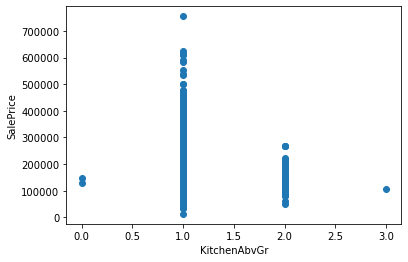

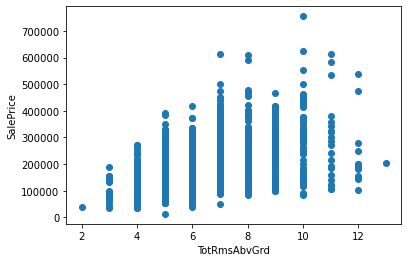

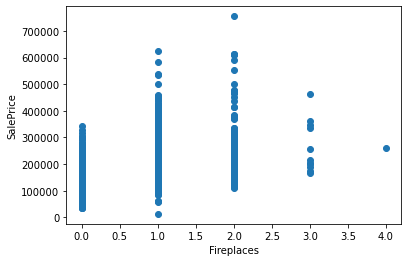

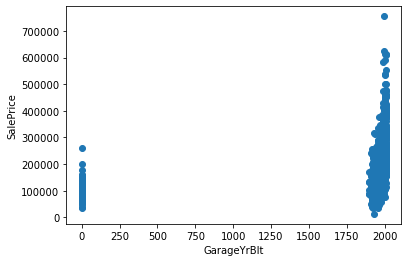

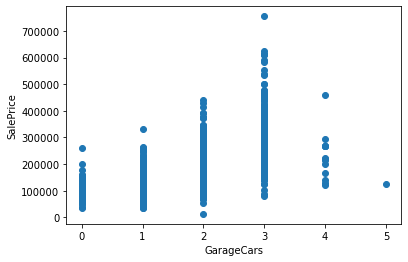

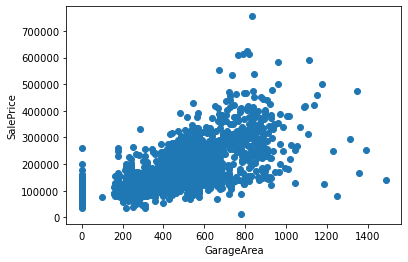

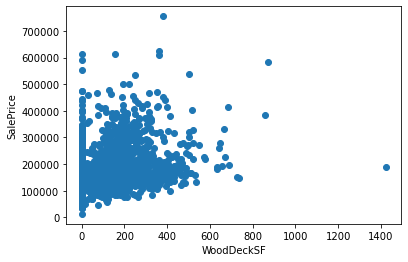

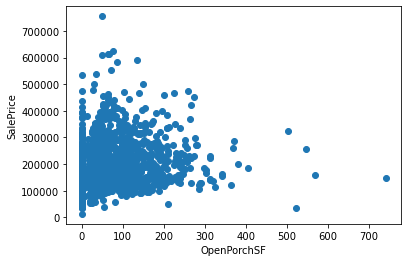

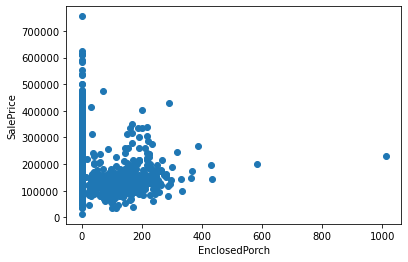

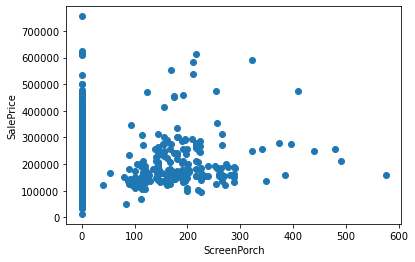

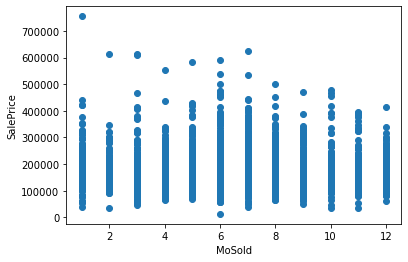

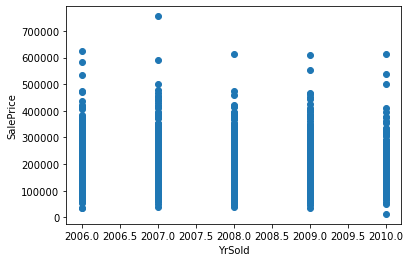

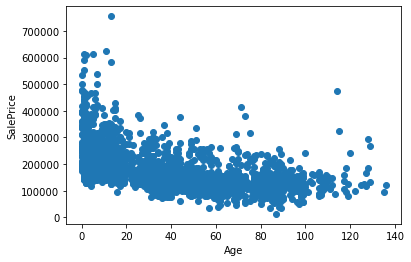

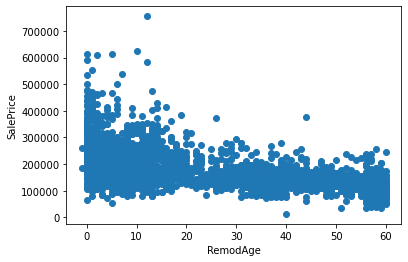

<IPython.core.display.Javascript object>

In [68]:
# Visualizing relationship between features and target value
# Looking at the scatterplots there seems to be a linear relationship with GrLivArea, OverallQual, TotalBsmtSF, 
# 1stFlrSF, maybe Fireplaces, maybe GarageCars
target_variable = housing_cleaned.loc[:, 'SalePrice']


for col in numeric_features.columns:
    plt.scatter(housing_cleaned[col], target_variable)
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()


In [69]:
corr_matrix = housing_cleaned.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.790556
GrLivArea        0.719901
TotalBsmtSF      0.652451
1stFlrSF         0.642564
GarageCars       0.638600
GarageArea       0.634761
YearBuilt        0.544471
FullBath         0.535041
YearRemodAdd     0.514344
MasVnrArea       0.498502
TotRmsAbvGrd     0.490073
Fireplaces       0.488220
BsmtFinSF1       0.460905
WoodDeckSF       0.333051
OpenPorchSF      0.306385
BsmtFullBath     0.290870
HalfBath         0.285719
LotArea          0.274136
2ndFlrSF         0.263091
GarageYrBlt      0.246218
LotFrontage      0.177295
BsmtUnfSF        0.168174
BedroomAbvGr     0.151681
ScreenPorch      0.121422
BsmtFinSF2       0.022691
MoSold           0.012650
YrSold          -0.001504
BsmtHalfBath    -0.033767
MSSubClass      -0.084394
OverallCond     -0.101382
KitchenAbvGr    -0.114226
EnclosedPorch   -0.123316
PID             -0.226093
RemodAge        -0.515498
Age             -0.544376
Name: SalePrice, dtype: float64

<IPython.core.display.Javascript object>

In [73]:
# # taking a look at categorical features and the relationship with SalePrice

# categorical_cols = housing_cleaned.select_dtypes(include=['object']).columns.tolist()

# for col in categorical_cols:
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x=col, y='SalePrice', data=housing_cleaned)
#     plt.xticks(rotation=45)
#     plt.title('Relationship between {} and SalePrice'.format(col))
#     plt.show()



<IPython.core.display.Javascript object>

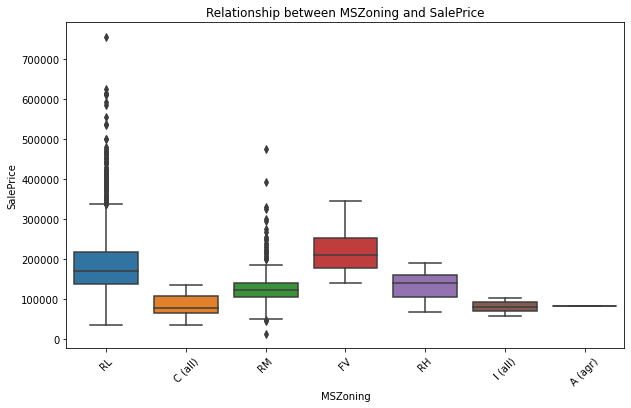

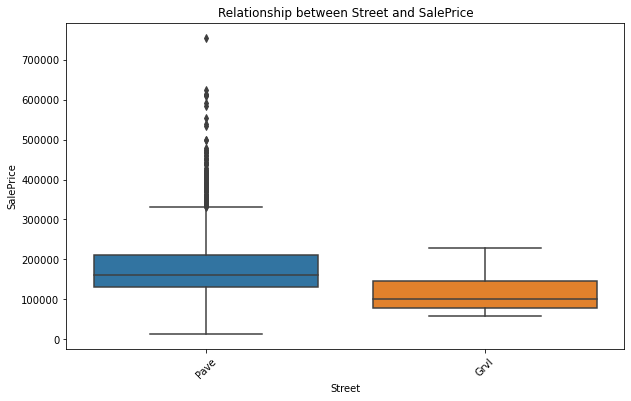

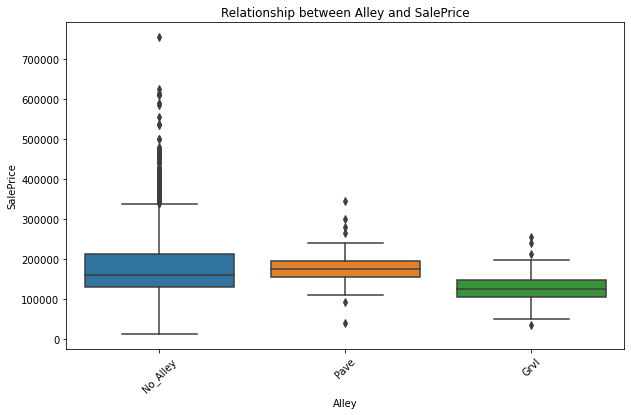

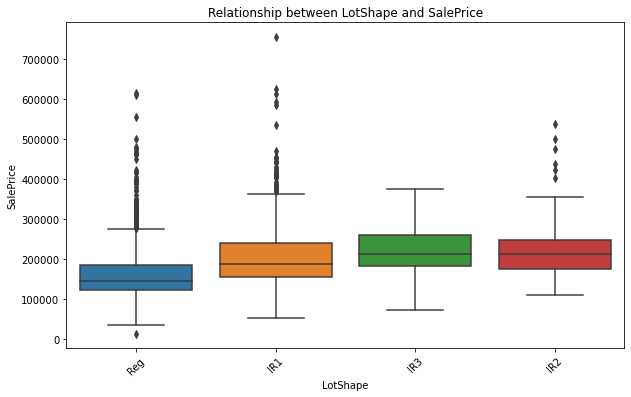

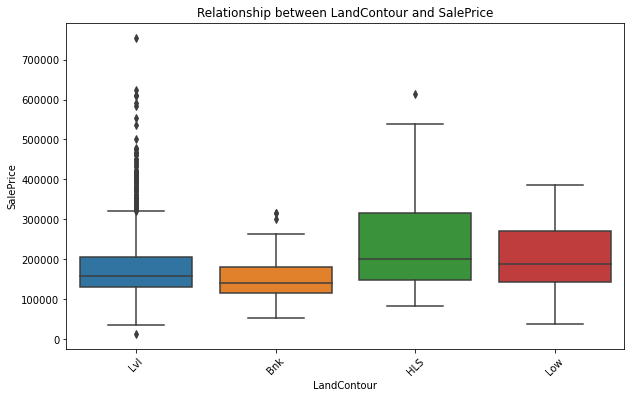

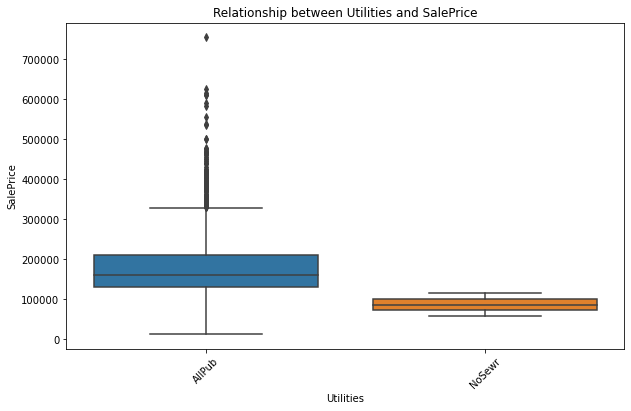

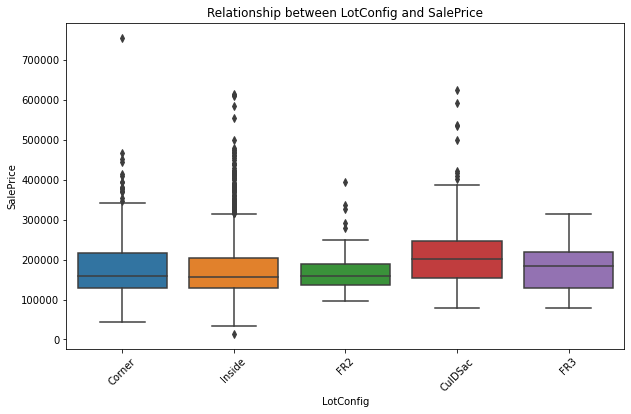

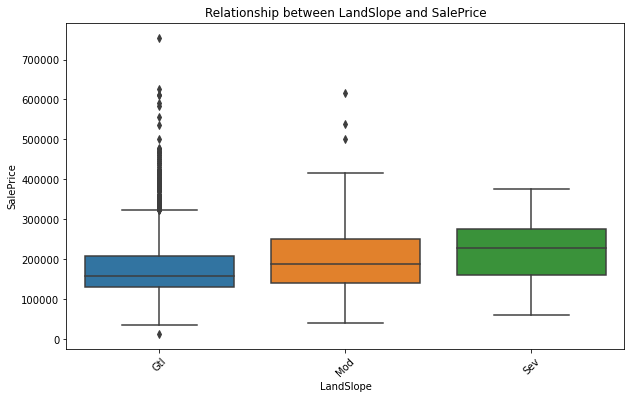

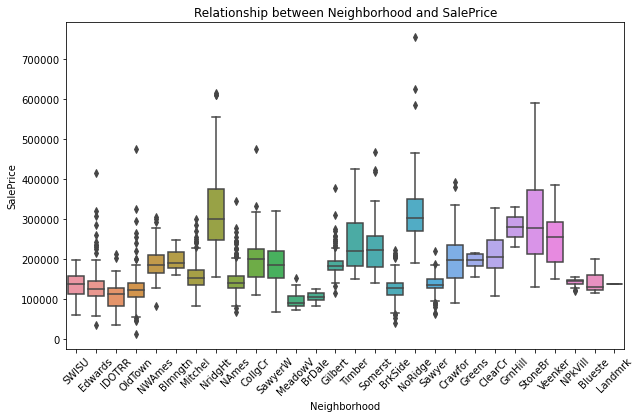

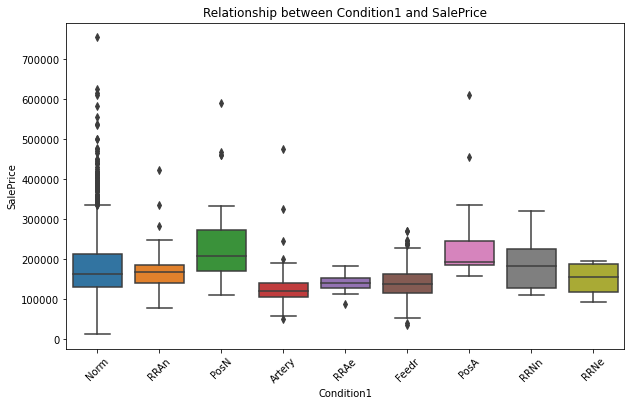

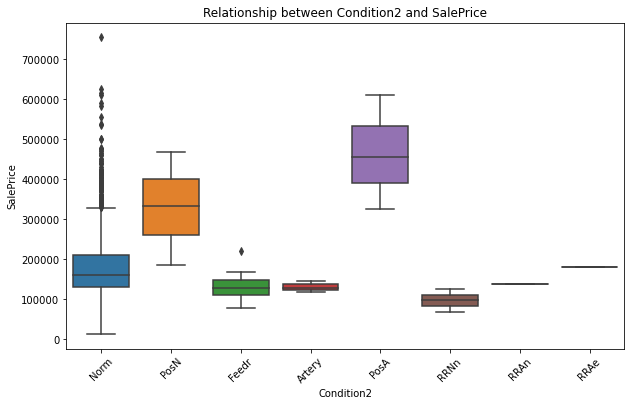

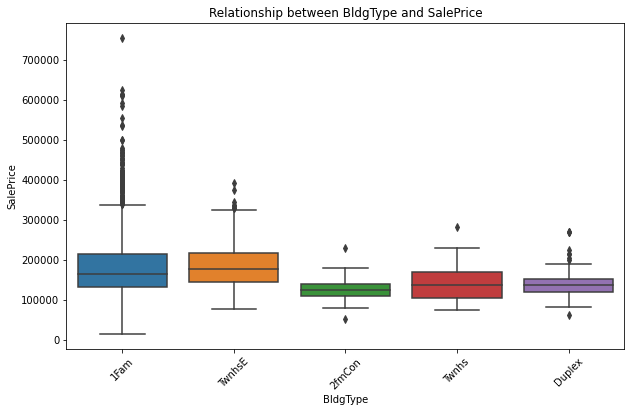

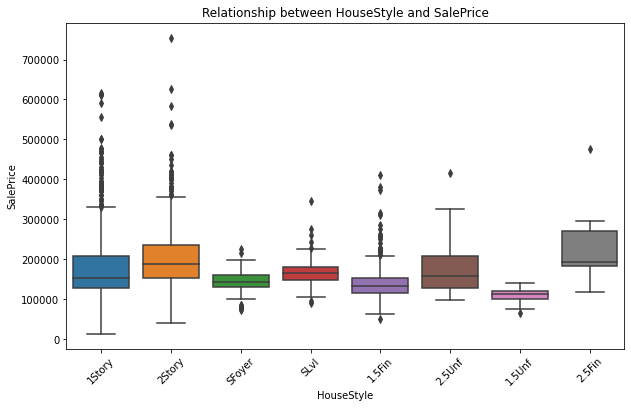

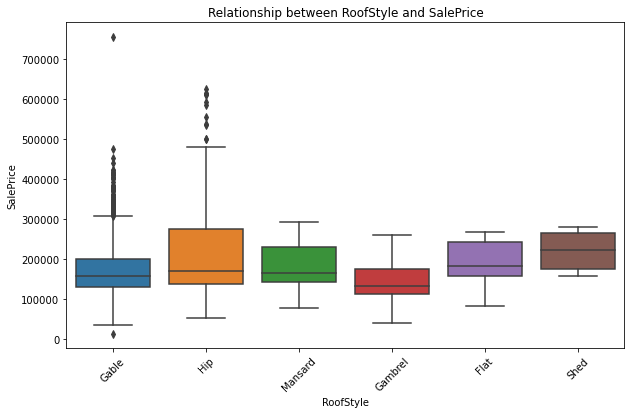

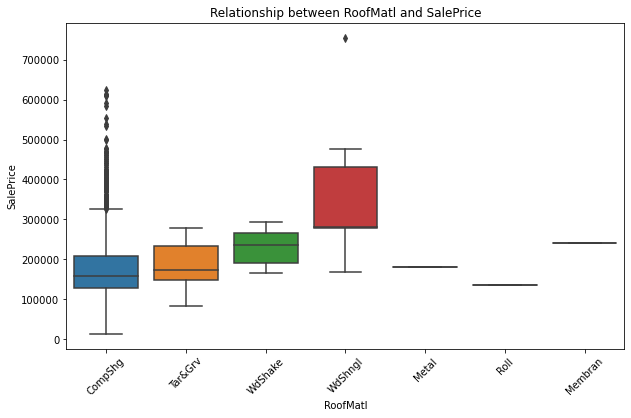

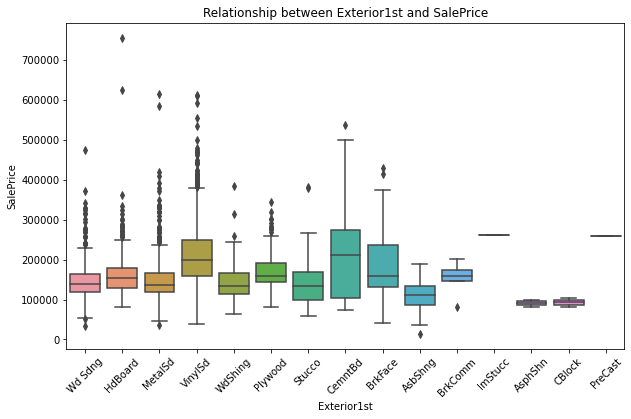

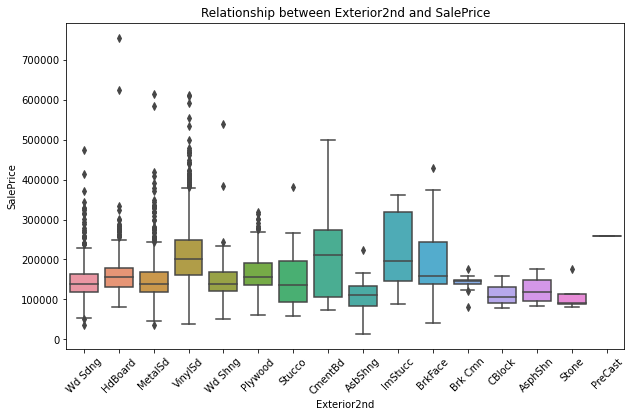

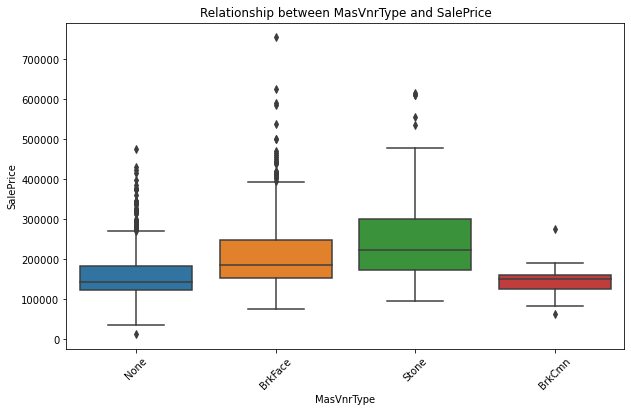

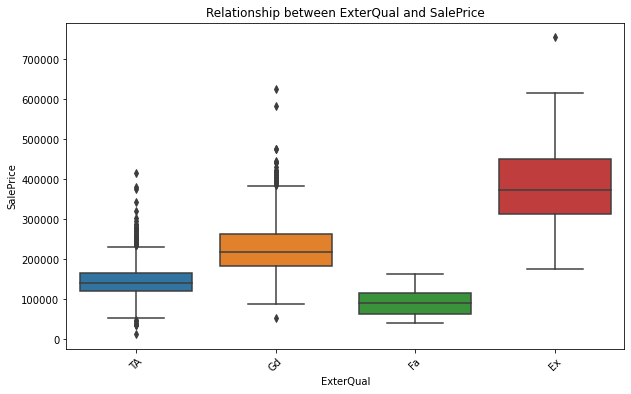

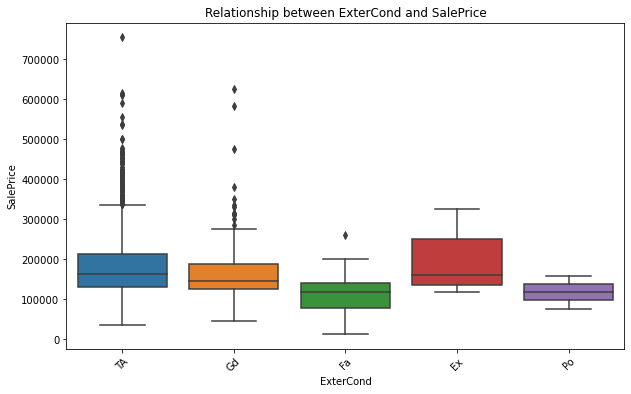

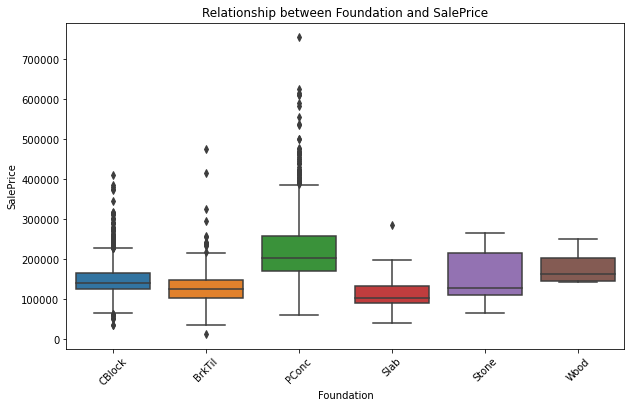

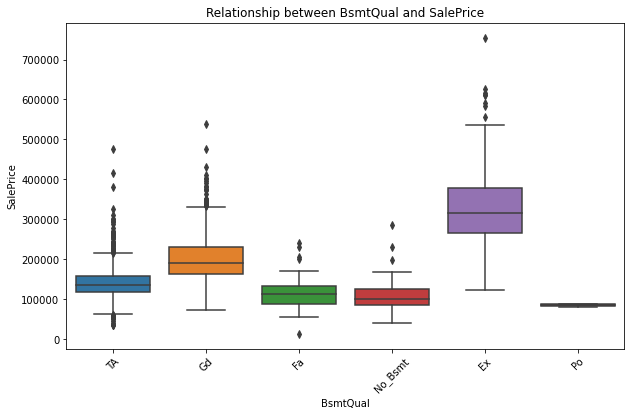

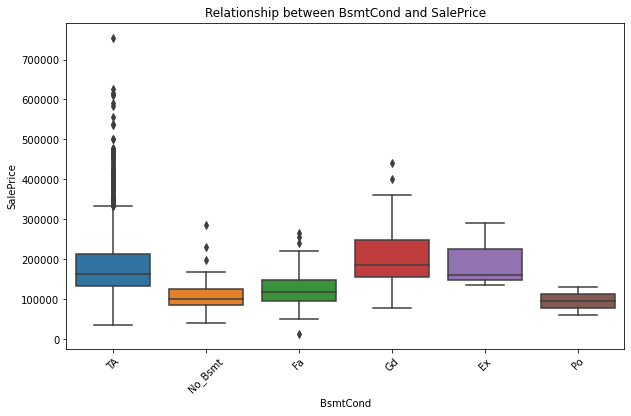

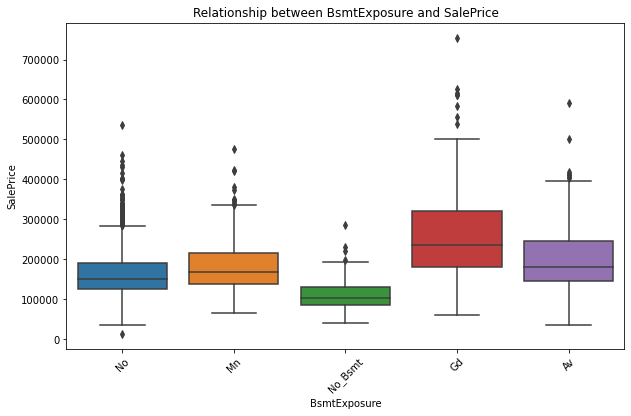

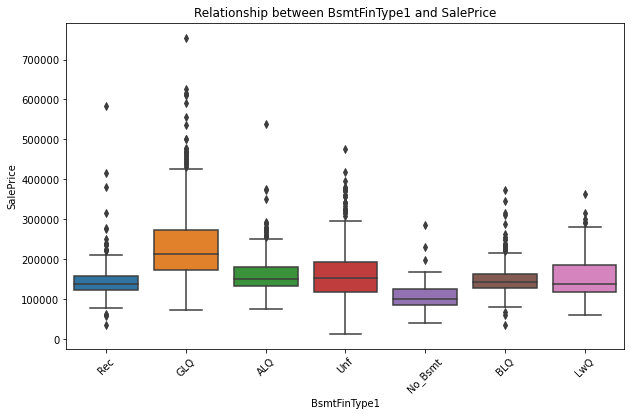

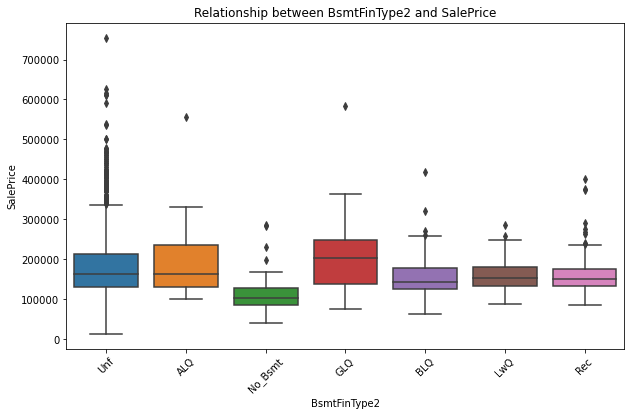

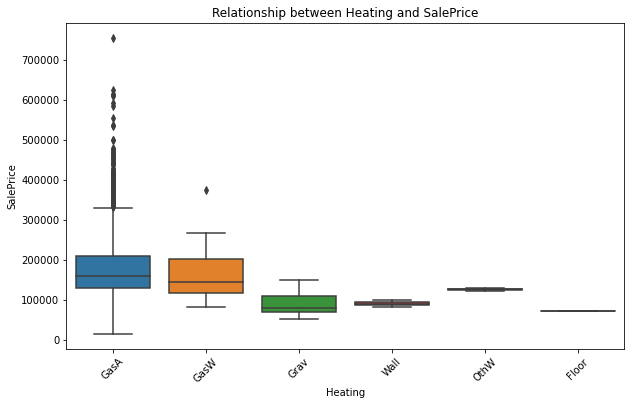

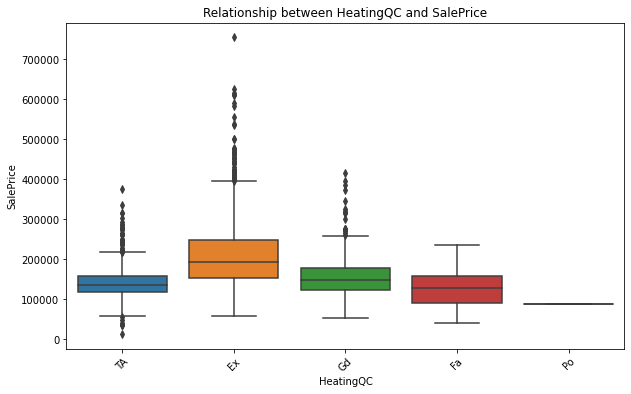

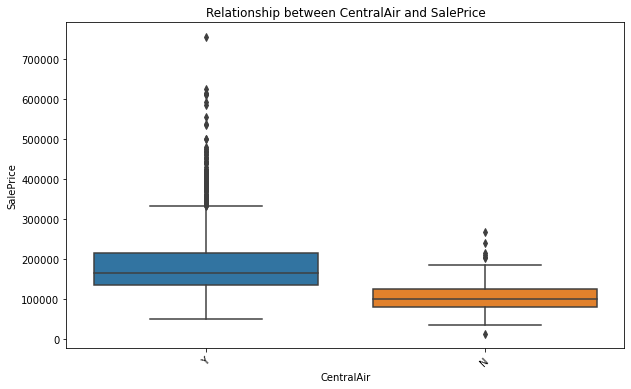

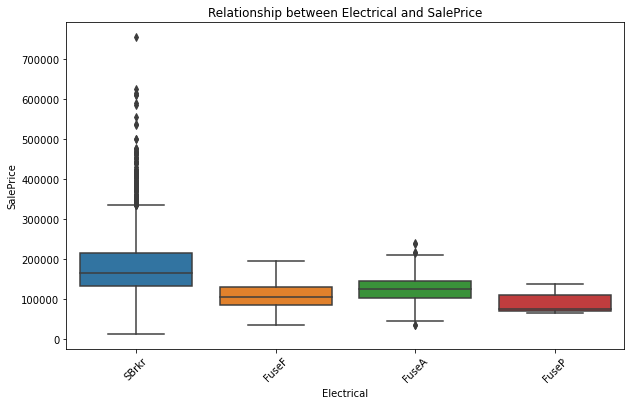

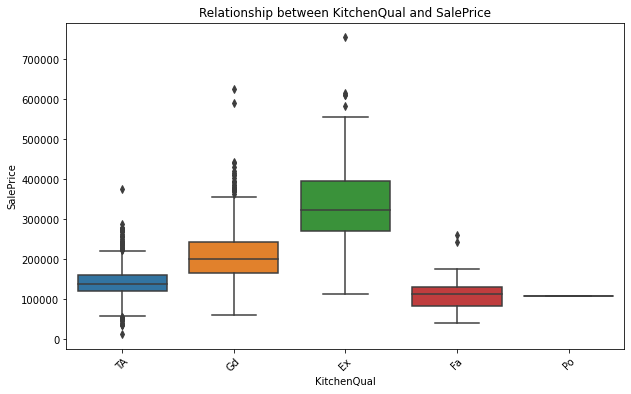

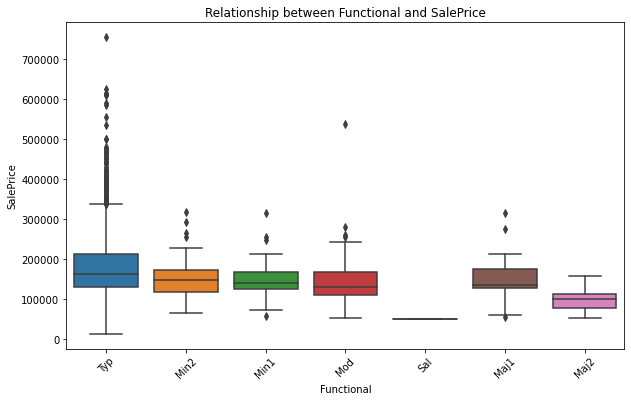

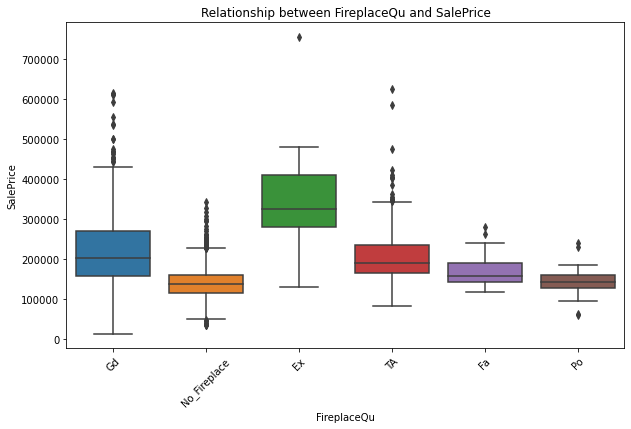

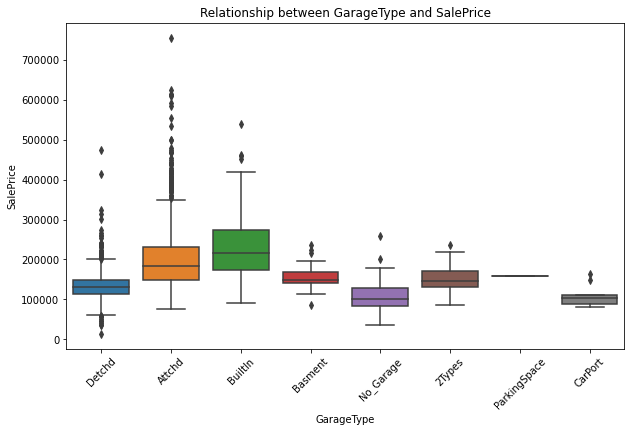

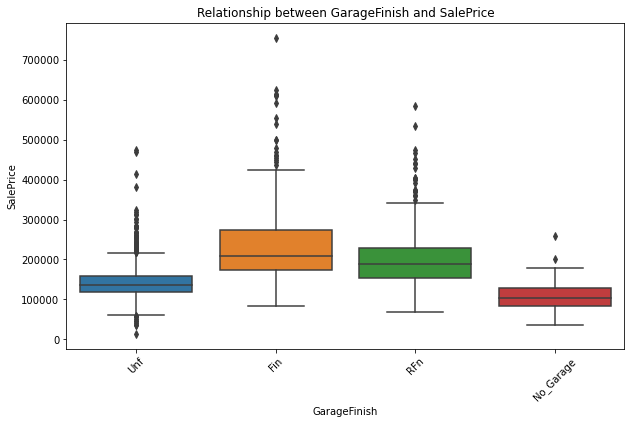

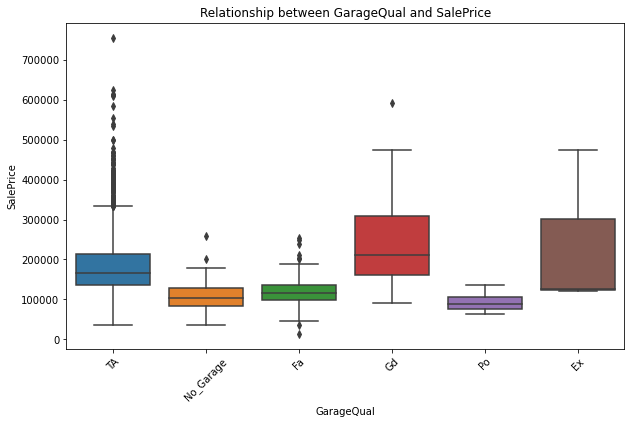

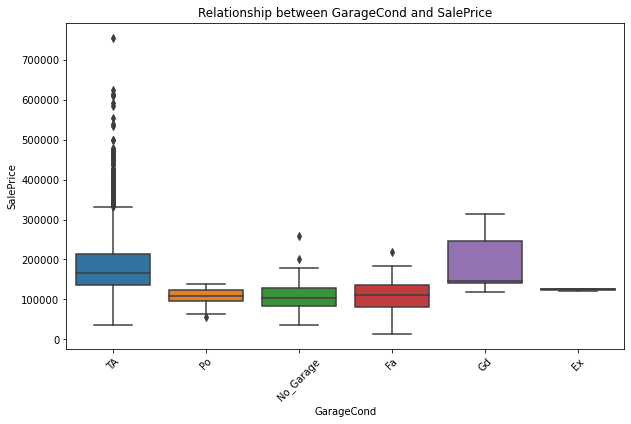

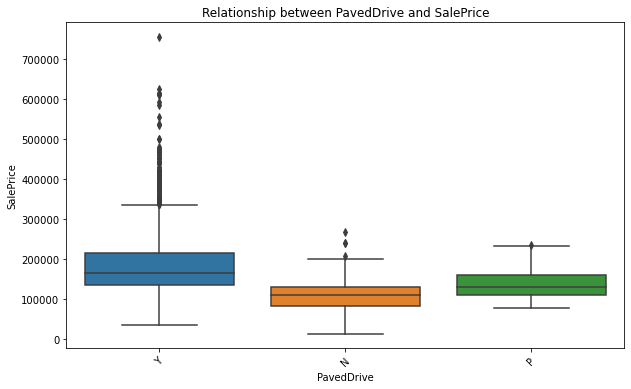

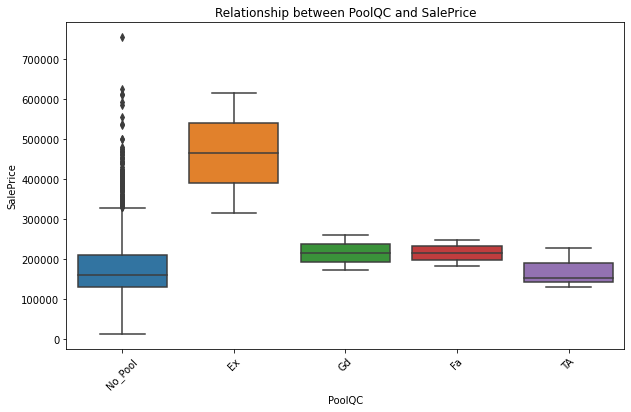

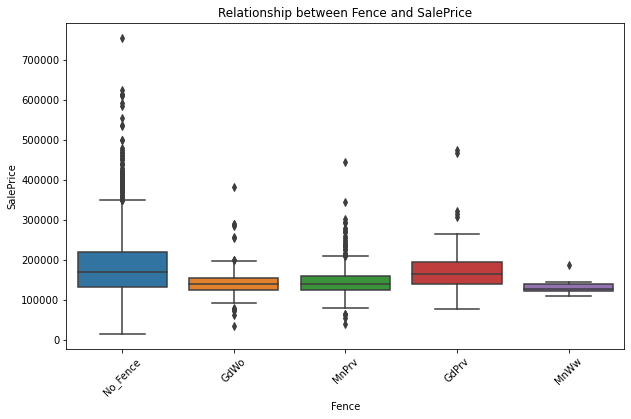

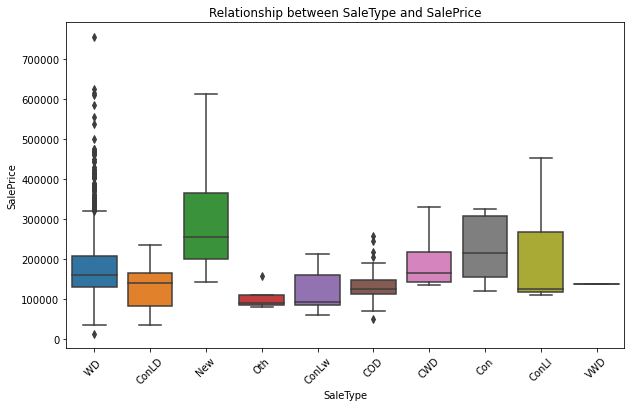

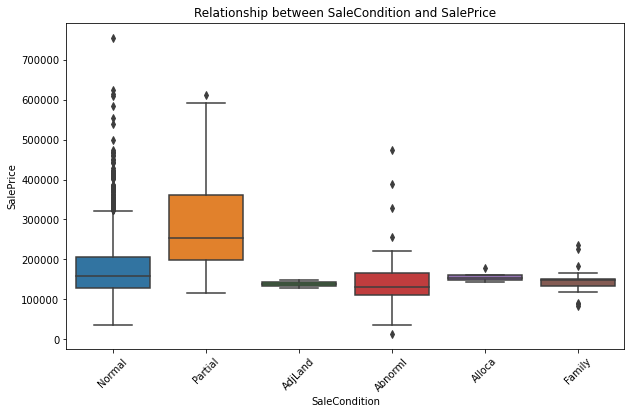

<IPython.core.display.Javascript object>

In [72]:
# boxplot for categorical features
# categories with that show little overlap and could be a strong predictor of the sale price:
# MSZoning(maybe), Neighborhood, RoofMat1(maybe), MasVnrType(maybe), ExterQual, CentralAir(maybe), 
# KitchenQual(maybe), SaleType(maybe,), 

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='SalePrice', data=housing_cleaned)
    plt.xticks(rotation=45)
    plt.title('Relationship between {} and SalePrice'.format(col))
    plt.show()


In [10]:
# creating a feature that has the total SF
housing_cleaned['TotalSF'] = housing_cleaned['GrLivArea'] + housing_cleaned['TotalBsmtSF']


<IPython.core.display.Javascript object>

In [11]:
# Creating a binary feature if the house was modeled
housing_cleaned['Remodeled'] = (housing_cleaned['YearBuilt'] != housing_cleaned['YearRemodAdd']).astype(int)


<IPython.core.display.Javascript object>

In [12]:
# creating a total SF for porch, I dropped the 3SsnPorch column earlier so i will have to add it back in first
housing = pd.read_csv("data/Ames_Housing_Price_Data.csv", index_col=0)
#merging the column to housing_cleaned
housing_cleaned = housing_cleaned.merge(housing[['PID', '3SsnPorch']], on='PID', how='left')

porch_columns = ['OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', '3SsnPorch']

housing_cleaned['TotalPorchSF'] = housing_cleaned[porch_columns].sum(axis=1)
# deleting the column 
housing_cleaned = housing_cleaned.drop('3SsnPorch', axis=1)


<IPython.core.display.Javascript object>

In [13]:
# combining the half bath and full bath to create total number of bathrooms feature
bath_columns = ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']
bath_weights = [1, 0.5, 1, 0.5]
housing_cleaned['TotalBath'] = (housing_cleaned[bath_columns] * bath_weights).sum(axis=1)


<IPython.core.display.Javascript object>

In [15]:
# MSSubClass is a  category feature however it is currently repesented by integers so i will create a new column
# with the numbers converted to a category.  I kept the old MSSubClass.
# create a dictionary to map integer codes to string labels
subclass_dict = {
    20: "subclass20",
    30: "subclass30",
    40: "subclass40",
    45: "subclass45",
    50: "subclass50",
    60: "subclass60",
    70: "subclass70",
    75: "subclass75",
    80: "subclass80",
    85: "subclass85",
    90: "subclass90",
    120: "subclass120",
    150: "subclass150",
    160: "subclass160",
    180: "subclass180",
    190: "subclass190"
}

# convert the MSSubClass variable to a categorical feature with string labels
housing_cleaned["MSSubClass_cat"] = housing_cleaned["MSSubClass"].replace(subclass_dict).astype("category")




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
housing_cleaned

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
0     909176150        856     126000          30       RL          0.0   
1     905476230       1049     139500         120       RL         42.0   
2     911128020       1001     124900          30  C (all)         60.0   
3     535377150       1039     114000          70       RL         80.0   
4     534177230       1665     227000          60       RL         70.0   
...         ...        ...        ...         ...      ...          ...   
2577  903205040        952     121000          30       RL          0.0   
2578  905402060       1733     139600          20       RL          0.0   
2579  909275030       2002     145000          90       RH         82.0   
2580  907192040       1842     217500          60       RL          0.0   
2581  906223180       1911     215000          60       RL         80.0   

      LotArea Street     Alley LotShape LandContour Utilities LotConfig  \
0        7890   Pave  No_Alley      Reg         Lvl    AllPub    Corner   
1        4235   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
2        6060   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
3        8146   Pave  No_Alley      Reg         Lvl    AllPub    Corner   
4        8400   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
...       ...    ...       ...      ...         ...       ...       ...   
2577     8854   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
2578    13680   Pave  No_Alley      IR1         Lvl    AllPub   CulDSac   
2579     6270   Pave  No_Alley      Reg         HLS    AllPub    Inside   
2580     8826   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
2581     9554   Pave  No_Alley      IR1         Lvl    AllPub    Inside   

     LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0          Gtl        SWISU       Norm       Norm     1Fam     1Story   
1          Gtl      Edwards       Norm       Norm   TwnhsE     1Story   
2          Gtl       IDOTRR       Norm       Norm     1Fam     1Story   
3          Gtl      OldTown       Norm       Norm     1Fam     2Story   
4          Gtl       NWAmes       Norm       Norm     1Fam     2Story   
...        ...          ...        ...        ...      ...        ...   
2577       Gtl      BrkSide       Norm       Norm     1Fam     1.5Unf   
2578       Gtl      Edwards       Norm       Norm     1Fam     1Story   
2579       Gtl      Crawfor       Norm       Norm   Duplex     2Story   
2580       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
2581       Gtl      SawyerW       Norm       Norm     1Fam     2Story   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0               6            6       1939          1950     Gable  CompShg   
1               5            5       1984          1984     Gable  CompShg   
2               5            9       1930          2007       Hip  CompShg   
3               4            8       1900          2003     Gable  CompShg   
4               8            6       2001          2001     Gable  CompShg   
...           ...          ...        ...           ...       ...      ...   
2577            6            6       1916          1950     Gable  CompShg   
2578            3            5       1955          1955       Hip  CompShg   
2579            5            6       1949          1950     Gable  CompShg   
2580            7            5       2000          2000     Gable  CompShg   
2581            8            5       1993          1994     Gable  CompShg   

     Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0        Wd Sdng     Wd Sdng       None         0.0        TA        TA   
1        HdBoard     HdBoard    BrkFace       149.0        Gd        TA   
2        MetalSd     MetalSd       None         0.0        Gd        TA   
3        MetalSd     MetalSd       None         0.0        Gd        Gd   
4        VinylSd     

<IPython.core.display.Javascript object>

In [96]:
# saving updated locations file
locations.to_csv("data/locations.csv", index=False)

<IPython.core.display.Javascript object>

In [97]:
locations = pd.read_csv("data/locations.csv")

<IPython.core.display.Javascript object>

In [98]:
locations

PID  SalePrice Neighborhood                       Prop_Addr  \
0     909176150     126000        SWISU      436 HAYWARD AVE, AMES, USA   
1     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
2     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
3     911128020     124900       IDOTRR         320 S 2ND ST, AMES, USA   
4     535377150     114000      OldTown     1524 DOUGLAS AVE, AMES, USA   
...         ...        ...          ...                             ...   
2599  903205040     121000      BrkSide   1021 RIDGEWOOD AVE, AMES, USA   
2600  905402060     139600      Edwards        3619 MARY CIR, AMES, USA   
2601  909275030     145000      Crawfor  2140 SUNSET DR 2142, AMES, USA   
2602  907192040     217500      CollgCr    5319 CLEMENS BLVD, AMES, USA   
2603  906223180     215000      SawyerW      1025 VERMONT CT, AMES, USA   

       latitude  longitude    street_name        Neighborhood_st street_type  
0     42.018564 -93.651619    HAYWARD_AVE      SWISU_HAYWARD_AVE         AVE  
1     42.024855 -93.663671        WEST_ST        Edwards_WEST_ST          ST  
2     42.024855 -93.663671        WEST_ST        Edwards_WEST_ST          ST  
3     42.021548 -93.614068       S_2ND_ST        IDOTRR_S_2ND_ST          ST  
4     42.037391 -93.612207    DOUGLAS_AVE    OldTown_DOUGLAS_AVE         AVE  
...         ...        ...            ...                    ...         ...  
2599  42.032102 -93.626373  RIDGEWOOD_AVE  BrkSide_RIDGEWOOD_AVE         AVE  
2600  42.027669 -93.666138       MARY_CIR       Edwards_MARY_CIR         CIR  
2601  42.020129 -93.643832      SUNSET_DR      Crawfor_SUNSET_DR          DR  
2602  42.016802 -93.689748   CLEMENS_BLVD   CollgCr_CLEMENS_BLVD        BLVD  
2603  42.030997 -93.682220     VERMONT_CT     SawyerW_VERMONT_CT          CT  

[2604 rows x 9 columns]

<IPython.core.display.Javascript object>

In [109]:
from haversine import haversine

# define the coordinates of negative locations and positive locations
neg_locs = [('North Grand Mall', (42.049408, -93.609140)),
            ('Donald and Ruth Furman Aquatic Center', (42.011550, -93.635771)),
            ('Ames Municipal Cemetery', (42.033434, -93.616420))]
pos_locs = [('Jack Trice Stadium', (42.013916, -93.635853)),
            ('Ada Hayden Heritage Park', (42.073107, -93.684882)),
            ('Charles and June Calhoun Park', (42.033966, -93.649235))]



# define a function to calculate distances to negative and positive locations
def calc_distances(row):
    lat1, lon1 = row['latitude'], row['longitude']
    neg_distances = [haversine((lat1, lon1), loc[1]) for loc in neg_locs]
    pos_distances = [haversine((lat1, lon1), loc[1]) for loc in pos_locs]
    row['Neg_Loc_Dist'] = min(neg_distances)
    row['Pos_Loc_Dist'] = min(pos_distances)
    return row

# apply the function to each row of the dataframe and save the results
locations = locations.apply(calc_distances, axis=1)

# print the updated dataframe
print(locations.head())







         PID  SalePrice Neighborhood                    Prop_Addr   latitude  \
0  909176150     126000        SWISU   436 HAYWARD AVE, AMES, USA  42.018564   
1  905476230     139500      Edwards      3416 WEST ST, AMES, USA  42.024855   
2  905476230     139500      Edwards      3416 WEST ST, AMES, USA  42.024855   
3  911128020     124900       IDOTRR      320 S 2ND ST, AMES, USA  42.021548   
4  535377150     114000      OldTown  1524 DOUGLAS AVE, AMES, USA  42.037391   

   longitude  street_name      Neighborhood_st street_type  Neg_Loc_Dist  \
0 -93.651619  HAYWARD_AVE    SWISU_HAYWARD_AVE         AVE      1.524009   
1 -93.663671      WEST_ST      Edwards_WEST_ST          ST      2.738817   
2 -93.663671      WEST_ST      Edwards_WEST_ST          ST      2.738817   
3 -93.614068     S_2ND_ST      IDOTRR_S_2ND_ST          ST      1.335907   
4 -93.612207  DOUGLAS_AVE  OldTown_DOUGLAS_AVE         AVE      0.560992   

   Pos_Loc_Dist  
0      1.401306  
1      1.564610  
2      1

<IPython.core.display.Javascript object>

In [110]:
locations

PID  SalePrice Neighborhood                       Prop_Addr  \
0     909176150     126000        SWISU      436 HAYWARD AVE, AMES, USA   
1     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
2     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
3     911128020     124900       IDOTRR         320 S 2ND ST, AMES, USA   
4     535377150     114000      OldTown     1524 DOUGLAS AVE, AMES, USA   
...         ...        ...          ...                             ...   
2599  903205040     121000      BrkSide   1021 RIDGEWOOD AVE, AMES, USA   
2600  905402060     139600      Edwards        3619 MARY CIR, AMES, USA   
2601  909275030     145000      Crawfor  2140 SUNSET DR 2142, AMES, USA   
2602  907192040     217500      CollgCr    5319 CLEMENS BLVD, AMES, USA   
2603  906223180     215000      SawyerW      1025 VERMONT CT, AMES, USA   

       latitude  longitude    street_name        Neighborhood_st street_type  \
0     42.018564 -93.651619    HAYWARD_AVE      SWISU_HAYWARD_AVE         AVE   
1     42.024855 -93.663671        WEST_ST        Edwards_WEST_ST          ST   
2     42.024855 -93.663671        WEST_ST        Edwards_WEST_ST          ST   
3     42.021548 -93.614068       S_2ND_ST        IDOTRR_S_2ND_ST          ST   
4     42.037391 -93.612207    DOUGLAS_AVE    OldTown_DOUGLAS_AVE         AVE   
...         ...        ...            ...                    ...         ...   
2599  42.032102 -93.626373  RIDGEWOOD_AVE  BrkSide_RIDGEWOOD_AVE         AVE   
2600  42.027669 -93.666138       MARY_CIR       Edwards_MARY_CIR         CIR   
2601  42.020129 -93.643832      SUNSET_DR      Crawfor_SUNSET_DR          DR   
2602  42.016802 -93.689748   CLEMENS_BLVD   CollgCr_CLEMENS_BLVD        BLVD   
2603  42.030997 -93.682220     VERMONT_CT     SawyerW_VERMONT_CT          CT   

      Neg_Loc_Dist  Pos_Loc_Dist  
0         1.524009      1.401306  
1         2.738817      1.564610  
2         2.738817      1.564610  
3         1.335907      1.989709  
4         0.560992      3.081691  
...            ...           ...  
2599      0.835261      1.899556  
2600      3.083122      1.561830  
2601      1.163397      0.954868  
2602      4.497454      3.852437  
2603      4.404339      2.744212  

[2604 rows x 11 columns]

<IPython.core.display.Javascript object>

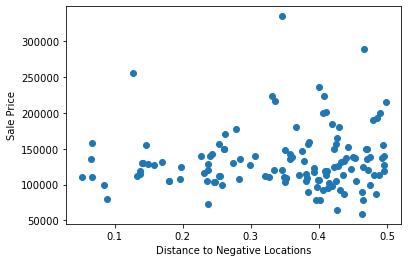

Correlation coefficient: 0.08063643615277553


<IPython.core.display.Javascript object>

In [112]:
import matplotlib.pyplot as plt

#  filter the locations dataframe to only include observations that are less than 0.5 miles away from negative locations
locations_filtered = locations[(locations['Neg_Loc_Dist'] < 0.5)]


# create a scatter plot of Neg_Loc_Dist vs SalePrice
plt.scatter(locations_filtered['Neg_Loc_Dist'], locations_filtered['SalePrice'])
plt.xlabel('Distance to Negative Locations')
plt.ylabel('Sale Price')
plt.show()

# calculate the correlation between Neg_Loc_Dist and SalePrice
corr_coef = locations_filtered['Neg_Loc_Dist'].corr(locations_filtered['SalePrice'])
print('Correlation coefficient:', corr_coef)


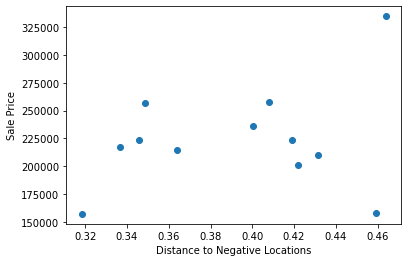

Correlation coefficient: 0.2802339693429979


<IPython.core.display.Javascript object>

In [113]:
#  filter the locations dataframe to only include observations that are less than 0.5 miles away from negative locations
locations_filtered = locations[(locations["Pos_Loc_Dist"] < 0.5)]


# create a scatter plot of Neg_Loc_Dist vs SalePrice
plt.scatter(locations_filtered["Pos_Loc_Dist"], locations_filtered["SalePrice"])
plt.xlabel("Distance to Negative Locations")
plt.ylabel("Sale Price")
plt.show()

# calculate the correlation between Neg_Loc_Dist and SalePrice
corr_coef = locations_filtered["Pos_Loc_Dist"].corr(locations_filtered["SalePrice"])
print("Correlation coefficient:", corr_coef)

<AxesSubplot:xlabel='street_type', ylabel='SalePrice'>

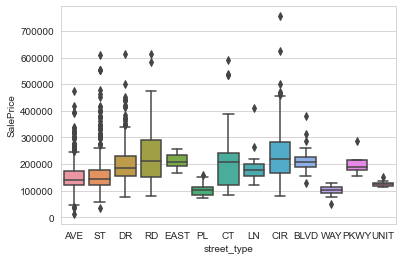

<IPython.core.display.Javascript object>

In [119]:
sns.set_style('whitegrid')
sns.violinplot(x='street_name', y='SalePrice', data=locations)

In [121]:
# group by street_name and calculate summary statistics for SalePrice
summary = locations.groupby("street_type")["SalePrice"].agg(
    ["mean", "count", "std", "min", "max"]
)

# print the summary statistics
print(summary)

                      mean  count            std     min     max
street_type                                                     
AVE          150177.337486    883   50074.303855   12789  475000
BLVD         212805.000000     50   39785.729995  130000  381000
CIR          238800.234899    149  102275.602750   80000  755000
CT           210953.324675     77  110408.182610   85000  591587
DR           196866.025197    635   65765.421667   75000  615000
EAST         212362.500000      8   29156.618337  167900  255000
LN           188373.684211     19   64539.590280  122000  410000
PKWY         203612.500000      4   56212.252149  155000  284700
PL           104577.272727     33   22902.814684   73000  160250
RD           232743.475248    202   95019.975832   80000  611657
ST           162077.009579    522   73363.036528   35311  610000
UNIT         126914.285714      7   12811.508963  115000  151000
WAY           99830.000000     15   19748.614780   50000  129850


<IPython.core.display.Javascript object>

In [118]:
locations

PID  SalePrice Neighborhood                       Prop_Addr  \
0     909176150     126000        SWISU      436 HAYWARD AVE, AMES, USA   
1     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
2     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
3     911128020     124900       IDOTRR         320 S 2ND ST, AMES, USA   
4     535377150     114000      OldTown     1524 DOUGLAS AVE, AMES, USA   
...         ...        ...          ...                             ...   
2599  903205040     121000      BrkSide   1021 RIDGEWOOD AVE, AMES, USA   
2600  905402060     139600      Edwards        3619 MARY CIR, AMES, USA   
2601  909275030     145000      Crawfor  2140 SUNSET DR 2142, AMES, USA   
2602  907192040     217500      CollgCr    5319 CLEMENS BLVD, AMES, USA   
2603  906223180     215000      SawyerW      1025 VERMONT CT, AMES, USA   

       latitude  longitude    street_name        Neighborhood_st street_type  \
0     42.018564 -93.651619    HAYWARD_AVE      SWISU_HAYWARD_AVE         AVE   
1     42.024855 -93.663671        WEST_ST        Edwards_WEST_ST          ST   
2     42.024855 -93.663671        WEST_ST        Edwards_WEST_ST          ST   
3     42.021548 -93.614068       S_2ND_ST        IDOTRR_S_2ND_ST          ST   
4     42.037391 -93.612207    DOUGLAS_AVE    OldTown_DOUGLAS_AVE         AVE   
...         ...        ...            ...                    ...         ...   
2599  42.032102 -93.626373  RIDGEWOOD_AVE  BrkSide_RIDGEWOOD_AVE         AVE   
2600  42.027669 -93.666138       MARY_CIR       Edwards_MARY_CIR         CIR   
2601  42.020129 -93.643832      SUNSET_DR      Crawfor_SUNSET_DR          DR   
2602  42.016802 -93.689748   CLEMENS_BLVD   CollgCr_CLEMENS_BLVD        BLVD   
2603  42.030997 -93.682220     VERMONT_CT     SawyerW_VERMONT_CT          CT   

      Neg_Loc_Dist  Pos_Loc_Dist  
0         1.524009      1.401306  
1         2.738817      1.564610  
2         2.738817      1.564610  
3         1.335907      1.989709  
4         0.560992      3.081691  
...            ...           ...  
2599      0.835261      1.899556  
2600      3.083122      1.561830  
2601      1.163397      0.954868  
2602      4.497454      3.852437  
2603      4.404339      2.744212  

[2604 rows x 11 columns]

<IPython.core.display.Javascript object>

In [91]:
# saving updated housing_cleaned file
housing_cleaned.to_csv("data/housing_cleaned.csv", index=False)

<IPython.core.display.Javascript object>

In [ ]:
# Feature engineering, correlation analysis and dimensionality reduction will be handled in different notebook for 
# different models

In [94]:
housing_cleaned["Neighborhood"].value_counts()

NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker     23
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

<IPython.core.display.Javascript object>

In [95]:
locations["street_name"].value_counts()

CLARK_AVE           37
CARROLL_AVE         29
CLEMENS_BLVD        28
EISENHOWER_AVE      28
NORTHWESTERN_AVE    28
                    ..
RED_OAK_DR           1
BALSAM_CIR           1
HUNZIKER_CIR         1
N_4TH_ST             1
HEMLOCK_CIR          1
Name: street_name, Length: 445, dtype: int64

<IPython.core.display.Javascript object>

In [100]:
locations.columns

Index(['PID', 'SalePrice', 'Neighborhood', 'Prop_Addr', 'latitude',
       'longitude', 'street_name', 'Neighborhood_st'],
      dtype='object')

<IPython.core.display.Javascript object>

In [101]:
housing_cleaned.shape

(2580, 78)

<IPython.core.display.Javascript object>

In [102]:
unique_prices = len(locations['SalePrice'].unique())
print("Number of unique SalePrice values:", unique_prices)


Number of unique SalePrice values: 861


<IPython.core.display.Javascript object>

In [ ]:
# After examining the distribution of SalePrice in the dataset and considering that i want to capture
# subtle differences between groups, I chose to group the streets into 10 to 20
# quantiles. This is because having too few quantiles may not capture the nuances in sale prices
# between different street groups, while having too many quantiles may lead to overfitting and
# decreased model generalization. Additionally, 10 to 20 quantiles allows for a good balance
# between capturing nuances in the data and avoiding overfitting.



In [17]:
# DOESNT WORK  REMOVE




# # decided to use the code in the following cell
# # Define a function to group streets by sale price
# def group_streets_by_saleprice(df):
#     # Calculate the mean sale price for each street
#     street_prices = df.groupby('street_name')['SalePrice'].mean()
#     # Group the streets into 10 quantiles based on sale price
#     groups_10 = pd.qcut(street_prices, q=10, labels=['very low', 'low', 'medium-low', 'low-medium', 'medium', 'medium-high', 'high-medium', 'high', 'very high', 'extremely high'])
#     # Group the streets into 20 quantiles based on sale price
#     groups_20 = pd.qcut(street_prices, q=20, labels=['very low', 'low', 'low-medium', 'medium-low', 'medium', 'low-medium-high', 'high-low-medium', 'medium-high', 'high-medium', 'high', 'very high', 'extremely low', 'very low-medium', 'very high-medium', 'extremely high', 'high-very low', 'low-very high', 'very low-extremely high', 'very low-very high', 'very low-extremely low'])
#     # Create new columns that represent the sale price group for each street using 10 and 20 quantiles
#     df['street_saleprice_group_10q'] = df['street_name'].map(street_prices).map(groups_10)
#     df['street_saleprice_group_20q'] = df['street_name'].map(street_prices).map(groups_20)
#     return df

# # Apply the function to your dataframe
# locations1 = group_streets_by_saleprice(locations)


<IPython.core.display.Javascript object>

In [19]:


def group_streets_by_saleprice(df, num_quantiles=4):
    # Calculate the mean sale price for each street
    street_prices = df.groupby('street_name')['SalePrice'].mean()
    # Group the streets into the specified number of quantiles based on sale price
    labels = [f'group_{i+1}' for i in range(num_quantiles)]
    groups = pd.qcut(street_prices, q=num_quantiles, labels=labels)
    # Create a dictionary that maps each street name to its corresponding sale price group label
    street_group_dict = dict(zip(street_prices.index, groups))
    return street_group_dict



<IPython.core.display.Javascript object>

In [20]:
# Apply the function to create a dictionary for 10 quantiles
street_group_dict_10q = group_streets_by_saleprice(locations, num_quantiles=10)

# Apply the function to create a dictionary for 20 quantiles
street_group_dict_20q = group_streets_by_saleprice(locations, num_quantiles=20)



<IPython.core.display.Javascript object>

In [23]:
locations

SalePrice Neighborhood                       Prop_Addr   latitude  \
PID                                                                            
909176150     126000        SWISU      436 HAYWARD AVE, AMES, USA  42.018564   
905476230     139500      Edwards         3416 WEST ST, AMES, USA  42.024855   
905476230     139500      Edwards         3416 WEST ST, AMES, USA  42.024855   
911128020     124900       IDOTRR         320 S 2ND ST, AMES, USA  42.021548   
535377150     114000      OldTown     1524 DOUGLAS AVE, AMES, USA  42.037391   
...              ...          ...                             ...        ...   
903205040     121000      BrkSide   1021 RIDGEWOOD AVE, AMES, USA  42.032102   
905402060     139600      Edwards        3619 MARY CIR, AMES, USA  42.027669   
909275030     145000      Crawfor  2140 SUNSET DR 2142, AMES, USA  42.020129   
907192040     217500      CollgCr    5319 CLEMENS BLVD, AMES, USA  42.016802   
906223180     215000      SawyerW      1025 VERMONT CT, AMES, USA  42.030997   

           longitude    street_name        Neighborhood_st street_type  \
PID                                                                      
909176150 -93.651619    HAYWARD_AVE      SWISU_HAYWARD_AVE         AVE   
905476230 -93.663671        WEST_ST        Edwards_WEST_ST          ST   
905476230 -93.663671        WEST_ST        Edwards_WEST_ST          ST   
911128020 -93.614068       S_2ND_ST        IDOTRR_S_2ND_ST          ST   
535377150 -93.612207    DOUGLAS_AVE    OldTown_DOUGLAS_AVE         AVE   
...              ...            ...                    ...         ...   
903205040 -93.626373  RIDGEWOOD_AVE  BrkSide_RIDGEWOOD_AVE         AVE   
905402060 -93.666138       MARY_CIR       Edwards_MARY_CIR         CIR   
909275030 -93.643832      SUNSET_DR      Crawfor_SUNSET_DR          DR   
907192040 -93.689748   CLEMENS_BLVD   CollgCr_CLEMENS_BLVD        BLVD   
906223180 -93.682220     VERMONT_CT     SawyerW_VERMONT_CT          CT   

          street_saleprice_group_10q street_saleprice_group_20q  
PID                                                              
909176150                        NaN                        NaN  
905476230                        NaN                        NaN  
905476230                        NaN                        NaN  
911128020                        NaN                        NaN  
535377150                        NaN                        NaN  
...                              ...                        ...  
903205040                        NaN                        NaN  
905402060                        NaN                        NaN  
909275030                        NaN                        NaN  
907192040                        NaN                        NaN  
906223180                        NaN                        NaN  

[2604 rows x 10 columns]

<IPython.core.display.Javascript object>

In [24]:
locations['Street_10_Quantiles'] = locations['street_name'].map(street_group_dict_10q)
locations["Street_20_Quantiles"] = locations["street_name"].map(street_group_dict_20q)

<IPython.core.display.Javascript object>

In [25]:
print(locations[['Street_10_Quantiles', 'Street_20_Quantiles']].isna().any())



Street_10_Quantiles    False
Street_20_Quantiles    False
dtype: bool


<IPython.core.display.Javascript object>

In [55]:
# adding 3 columns to housing_cleaned from locations
housing_cleaned = housing_cleaned.merge(locations[['PID', 'street_type'']], on='PID', how='left')


SyntaxError: invalid syntax (3519609874.py, line 2)

ERROR:root:Cannot parse: 2:80: housing_cleaned = housing_cleaned.merge(locations[['PID', 'street_type'']], on='PID', how='left')
Traceback (most recent call last):
  File "/Users/jasonphillip/opt/anaconda3/lib/python3.9/site-packages/lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "/Users/jasonphillip/opt/anaconda3/lib/python3.9/site-packages/lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "/Users/jasonphillip/opt/anaconda3/lib/python3.9/site-packages/black.py", line 725, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "/Users/jasonphillip/opt/anaconda3/lib/python3.9/site-packages/black.py", line 836, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 2:80: housing_cleaned = housing_cleaned.merge(locations[['PID', 'street_type'']], on='PID', how='left')


In [57]:
locations

PID  SalePrice Neighborhood                       Prop_Addr  \
0     909176150     126000        SWISU      436 HAYWARD AVE, AMES, USA   
1     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
2     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
3     911128020     124900       IDOTRR         320 S 2ND ST, AMES, USA   
4     535377150     114000      OldTown     1524 DOUGLAS AVE, AMES, USA   
...         ...        ...          ...                             ...   
2599  903205040     121000      BrkSide   1021 RIDGEWOOD AVE, AMES, USA   
2600  905402060     139600      Edwards        3619 MARY CIR, AMES, USA   
2601  909275030     145000      Crawfor  2140 SUNSET DR 2142, AMES, USA   
2602  907192040     217500      CollgCr    5319 CLEMENS BLVD, AMES, USA   
2603  906223180     215000      SawyerW      1025 VERMONT CT, AMES, USA   

       latitude  longitude    street_name        Neighborhood_st street_type  
0     42.018564 -93.651619    HAYWARD_AVE      SWISU_HAYWARD_AVE         AVE  
1     42.024855 -93.663671        WEST_ST        Edwards_WEST_ST          ST  
2     42.024855 -93.663671        WEST_ST        Edwards_WEST_ST          ST  
3     42.021548 -93.614068       S_2ND_ST        IDOTRR_S_2ND_ST          ST  
4     42.037391 -93.612207    DOUGLAS_AVE    OldTown_DOUGLAS_AVE         AVE  
...         ...        ...            ...                    ...         ...  
2599  42.032102 -93.626373  RIDGEWOOD_AVE  BrkSide_RIDGEWOOD_AVE         AVE  
2600  42.027669 -93.666138       MARY_CIR       Edwards_MARY_CIR         CIR  
2601  42.020129 -93.643832      SUNSET_DR      Crawfor_SUNSET_DR          DR  
2602  42.016802 -93.689748   CLEMENS_BLVD   CollgCr_CLEMENS_BLVD        BLVD  
2603  42.030997 -93.682220     VERMONT_CT     SawyerW_VERMONT_CT          CT  

[2604 rows x 9 columns]

<IPython.core.display.Javascript object>

In [33]:


merged_df = housing_cleaned.merge(locations[['PID', 'street_type', 'Street_10_Quantiles', 'Street_20_Quantiles']], on='PID')


KeyError: "['PID'] not in index"

<IPython.core.display.Javascript object>

In [ ]:
# save the updated dataframe as a CSV file
locations.to_csv('data/locations.csv', index=False)


In [65]:
locations = pd.read_csv('data/locations.csv')
locations


PID  SalePrice Neighborhood                       Prop_Addr  \
0     909176150     126000        SWISU      436 HAYWARD AVE, AMES, USA   
1     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
2     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
3     911128020     124900       IDOTRR         320 S 2ND ST, AMES, USA   
4     535377150     114000      OldTown     1524 DOUGLAS AVE, AMES, USA   
...         ...        ...          ...                             ...   
2599  903205040     121000      BrkSide   1021 RIDGEWOOD AVE, AMES, USA   
2600  905402060     139600      Edwards        3619 MARY CIR, AMES, USA   
2601  909275030     145000      Crawfor  2140 SUNSET DR 2142, AMES, USA   
2602  907192040     217500      CollgCr    5319 CLEMENS BLVD, AMES, USA   
2603  906223180     215000      SawyerW      1025 VERMONT CT, AMES, USA   

       latitude  longitude    street_name        Neighborhood_st street_type  
0     42.018564 -93.651619    HAYWARD_AVE      SWISU_HAYWARD_AVE         AVE  
1     42.024855 -93.663671        WEST_ST        Edwards_WEST_ST          ST  
2     42.024855 -93.663671        WEST_ST        Edwards_WEST_ST          ST  
3     42.021548 -93.614068       S_2ND_ST        IDOTRR_S_2ND_ST          ST  
4     42.037391 -93.612207    DOUGLAS_AVE    OldTown_DOUGLAS_AVE         AVE  
...         ...        ...            ...                    ...         ...  
2599  42.032102 -93.626373  RIDGEWOOD_AVE  BrkSide_RIDGEWOOD_AVE         AVE  
2600  42.027669 -93.666138       MARY_CIR       Edwards_MARY_CIR         CIR  
2601  42.020129 -93.643832      SUNSET_DR      Crawfor_SUNSET_DR          DR  
2602  42.016802 -93.689748   CLEMENS_BLVD   CollgCr_CLEMENS_BLVD        BLVD  
2603  42.030997 -93.682220     VERMONT_CT     SawyerW_VERMONT_CT          CT  

[2604 rows x 9 columns]

<IPython.core.display.Javascript object>

In [70]:
locations

PID  SalePrice Neighborhood                       Prop_Addr  \
0     909176150     126000        SWISU      436 HAYWARD AVE, AMES, USA   
1     905476230     139500      Edwards         3416 WEST ST, AMES, USA   
2     911128020     124900       IDOTRR         320 S 2ND ST, AMES, USA   
3     535377150     114000      OldTown     1524 DOUGLAS AVE, AMES, USA   
4     534177230     227000       NWAmes    2304 FILLMORE AVE, AMES, USA   
...         ...        ...          ...                             ...   
2554  903205040     121000      BrkSide   1021 RIDGEWOOD AVE, AMES, USA   
2555  905402060     139600      Edwards        3619 MARY CIR, AMES, USA   
2556  909275030     145000      Crawfor  2140 SUNSET DR 2142, AMES, USA   
2557  907192040     217500      CollgCr    5319 CLEMENS BLVD, AMES, USA   
2558  906223180     215000      SawyerW      1025 VERMONT CT, AMES, USA   

       latitude  longitude    street_name        Neighborhood_st street_type  
0     42.018564 -93.651619    HAYWARD_AVE      SWISU_HAYWARD_AVE         AVE  
1     42.024855 -93.663671        WEST_ST        Edwards_WEST_ST          ST  
2     42.021548 -93.614068       S_2ND_ST        IDOTRR_S_2ND_ST          ST  
3     42.037391 -93.612207    DOUGLAS_AVE    OldTown_DOUGLAS_AVE         AVE  
4     42.044554 -93.631818   FILLMORE_AVE    NWAmes_FILLMORE_AVE         AVE  
...         ...        ...            ...                    ...         ...  
2554  42.032102 -93.626373  RIDGEWOOD_AVE  BrkSide_RIDGEWOOD_AVE         AVE  
2555  42.027669 -93.666138       MARY_CIR       Edwards_MARY_CIR         CIR  
2556  42.020129 -93.643832      SUNSET_DR      Crawfor_SUNSET_DR          DR  
2557  42.016802 -93.689748   CLEMENS_BLVD   CollgCr_CLEMENS_BLVD        BLVD  
2558  42.030997 -93.682220     VERMONT_CT     SawyerW_VERMONT_CT          CT  

[2559 rows x 9 columns]

<IPython.core.display.Javascript object>

In [69]:
housing_cleaned

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
0     909176150        856     126000          30       RL          0.0   
1     905476230       1049     139500         120       RL         42.0   
2     911128020       1001     124900          30  C (all)         60.0   
3     535377150       1039     114000          70       RL         80.0   
4     534177230       1665     227000          60       RL         70.0   
...         ...        ...        ...         ...      ...          ...   
2577  903205040        952     121000          30       RL          0.0   
2578  905402060       1733     139600          20       RL          0.0   
2579  909275030       2002     145000          90       RH         82.0   
2580  907192040       1842     217500          60       RL          0.0   
2581  906223180       1911     215000          60       RL         80.0   

      LotArea Street     Alley LotShape LandContour Utilities LotConfig  \
0        7890   Pave  No_Alley      Reg         Lvl    AllPub    Corner   
1        4235   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
2        6060   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
3        8146   Pave  No_Alley      Reg         Lvl    AllPub    Corner   
4        8400   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
...       ...    ...       ...      ...         ...       ...       ...   
2577     8854   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
2578    13680   Pave  No_Alley      IR1         Lvl    AllPub   CulDSac   
2579     6270   Pave  No_Alley      Reg         HLS    AllPub    Inside   
2580     8826   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
2581     9554   Pave  No_Alley      IR1         Lvl    AllPub    Inside   

     LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0          Gtl        SWISU       Norm       Norm     1Fam     1Story   
1          Gtl      Edwards       Norm       Norm   TwnhsE     1Story   
2          Gtl       IDOTRR       Norm       Norm     1Fam     1Story   
3          Gtl      OldTown       Norm       Norm     1Fam     2Story   
4          Gtl       NWAmes       Norm       Norm     1Fam     2Story   
...        ...          ...        ...        ...      ...        ...   
2577       Gtl      BrkSide       Norm       Norm     1Fam     1.5Unf   
2578       Gtl      Edwards       Norm       Norm     1Fam     1Story   
2579       Gtl      Crawfor       Norm       Norm   Duplex     2Story   
2580       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
2581       Gtl      SawyerW       Norm       Norm     1Fam     2Story   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0               6            6       1939          1950     Gable  CompShg   
1               5            5       1984          1984     Gable  CompShg   
2               5            9       1930          2007       Hip  CompShg   
3               4            8       1900          2003     Gable  CompShg   
4               8            6       2001          2001     Gable  CompShg   
...           ...          ...        ...           ...       ...      ...   
2577            6            6       1916          1950     Gable  CompShg   
2578            3            5       1955          1955       Hip  CompShg   
2579            5            6       1949          1950     Gable  CompShg   
2580            7            5       2000          2000     Gable  CompShg   
2581            8            5       1993          1994     Gable  CompShg   

     Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0        Wd Sdng     Wd Sdng       None         0.0        TA        TA   
1        HdBoard     HdBoard    BrkFace       149.0        Gd        TA   
2        MetalSd     MetalSd       None         0.0        Gd        TA   
3        MetalSd     MetalSd       None         0.0        Gd        Gd   
4        VinylSd     

<IPython.core.display.Javascript object>

In [68]:
# select the PID column and check for duplicates
duplicates = locations["PID"].duplicated()

# print the duplicate PID values
print(locations[duplicates]["PID"])

Series([], Name: PID, dtype: int64)


<IPython.core.display.Javascript object>

In [64]:
# drop duplicates based on the PID column
locations.drop_duplicates(subset='PID', inplace=True)


<IPython.core.display.Javascript object>

In [66]:
# i was getting duplicates when i reloaded, dropped duplicates and saved the file. I forced the 
# encoding which solved the problem.

# read the CSV file with UTF-8 encoding
locations = pd.read_csv('data/locations.csv', encoding='utf-8')

# drop duplicates based on the PID column
locations.drop_duplicates(subset='PID', inplace=True)

# save the updated dataframe as a CSV file with UTF-8 encoding
locations.to_csv('data/locations.csv', index=False, encoding='utf-8')

# reload the CSV file with UTF-8 encoding
locations = pd.read_csv('data/locations.csv', encoding='utf-8')


<IPython.core.display.Javascript object>

In [71]:
# select the PID column from the housing_cleaned dataframe
housing_pid = housing_cleaned['PID']

# select the PID column from the locations dataframe
locations_pid = locations['PID']

# check which PID values are present in the housing_cleaned dataframe but not in the locations dataframe
missing_from_locations = housing_pid[~housing_pid.isin(locations_pid)]

# check which PID values are present in the locations dataframe but not in the housing_cleaned dataframe
missing_from_housing = locations_pid[~locations_pid.isin(housing_pid)]


<IPython.core.display.Javascript object>

In [82]:
# create a list of the PID values
pid_list = [531477050, 916253320, 535300120, 902205010, 902477120, 909129100, 
            916252170, 535426150, 904101170, 902401130, 916477060, 911175360, 
            902103150, 916403040, 902401120, 923125030, 908154040, 912251110, 
            905450020, 902205020]

# create boolean masks indicating whether each PID value is present in the MapRefNo and GeoRefNo columns
missing_from_locations_maprefno = real_estate['MapRefNo'].isin(pid_list)
missing_from_locations_georefno = real_estate['GeoRefNo'].isin(pid_list)

# count the number of rows in real_estate where each boolean mask is True
count_maprefno = missing_from_locations_maprefno.sum()
count_georefno = missing_from_locations_georefno.sum()

# print the results
print(f"{count_maprefno} rows in real_estate have a MapRefNo value in pid_list")
print(f"{count_georefno} rows in real_estate have a GeoRefNo value in pid_list")


0 rows in real_estate have a MapRefNo value in pid_list
0 rows in real_estate have a GeoRefNo value in pid_list


<IPython.core.display.Javascript object>

In [74]:
real_estate = pd.read_csv("data/Ames_Real_Estate_Data.csv")

/var/folders/2g/w2gh47jx2d536k1lqy8yjms40000gn/T/ipykernel_17974/4261627594.py:1: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate = pd.read_csv("data/Ames_Real_Estate_Data.csv")


<IPython.core.display.Javascript object>

In [78]:
# select the rows in real_estate where the MapRefNo column is in the missing_from_locations list
missing_from_locations_real_estate = real_estate[
    real_estate["GeoRefNo"].isin(missing_from_locations)
]
missing_from_locations_real_estate

Empty DataFrame
Columns: [MapRefNo, GeoRefNo, Tier, Range, Prop_Addr, ZngCdPr, ZngCdSc, ZngOLPr, ZngOLSc, ClassPr_S, ClassSc_S, Legal_Pr, SchD_S, TxD_S, MA_Ownr1, MA_Ownr2, MA_Line1, MA_Line2, MA_City, MA_State, MA_Zip1, MA_Zip2, Rcrd_Yr, Rcrd_Mo, Inst1_No, Inst1_Yr, Inst1_Mo, Inst1TPr, LndAc_S, ImpAc_S, OthAc_S, TtlVal_AsrYr, ValType, X1TPr_D, X1TSc_D, X2TPr_D, X2TSc_D, X1TPr_S, X1TSc_S, X2TPr_S, X2TSc_S, LndAcX1S, ImpAcX1S, ImpAcX2S, HSTtl_D, MilVal_D, HSTtl_S, MilVal_S, AcreX_S1, AcreGr, AcreNt_S, Neighborhood, LotArea, ParType, BldgNo_S, DwlgNo_S, BldgType, YrBuilt, HouseStyle, Foundation, RoofMatl, Ext1, Ext2, MasVnrType, Heating, Central Air, GLA, TtlBsmtSF, TotRmsAbvGrd, Fireplaces, PoolArea, GarageType, GarYrBlt, Cars, GarageArea, YrSold_YYYY, MoSold_MM, SalePrice, SaleType, SaleCond, ParclRel, PA-Nmbr, PA-PreD, PA-Strt, PA-StSfx, PA-PostD, PA-UnTyp, PA-UntNo, Date, Source, NmbrBRs]
Index: []

<IPython.core.display.Javascript object>

In [83]:
# creating a boolean mask indicating whether each PID value is present in the PID column of housing_cleaned
pid_in_housing_cleaned = housing_cleaned['PID'].isin(pid_list)

# selecting the rows in housing_cleaned where the PID column matches one of the values in pid_list
housing_cleaned_with_pid = housing_cleaned[pid_in_housing_cleaned]


<IPython.core.display.Javascript object>

In [84]:
housing_cleaned_with_pid

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
79    531477050       1012      67500          30       RH         70.0   
109   916253320       1502     330000         120       RM          0.0   
404   535300120       1382     176000          80       RL        120.0   
495   902205010        612      45000          30       RM         50.0   
558   902477120        720      34900          30  C (all)         60.0   
680   909129100       1520     159434          50       RH         55.0   
683   916252170       1295     230000         120       RM          0.0   
895   535426150       1142     113500          20       RL         80.0   
1088  904101170       1588     134432          50       RL         80.0   
1346  902401130       1482     143000          70       RM         50.0   
1516  916477060       2486     279900          60       RL          0.0   
1578  911175360       1336     108000          50  C (all)         60.0   
2013  902103150       1323     122600          50       RM         57.0   
2141  916403040       1240     174000          20       RL         42.0   
2170  902401120       2775     325000          75       RM         75.0   
2205  923125030       1600      81500          20  A (agr)        125.0   
2230  908154040       1698     320000          20       RL         86.0   
2325  912251110        810      57625          30  I (all)        109.0   
2527  905450020       1689     127500          20       RL         73.0   
2533  902205020       1141      85000          50       RM         50.0   

      LotArea Street     Alley LotShape LandContour Utilities LotConfig  \
79       9800   Pave  No_Alley      Reg         Lvl    AllPub    Corner   
109      9763   Pave  No_Alley      IR1         Lvl    AllPub    Inside   
404     19296   Pave  No_Alley      Reg         Lvl    AllPub    Corner   
495      5925   Pave  No_Alley      Reg         Lvl    AllPub    Corner   
558      7879   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
680      4500   Pave      Pave      IR2         Bnk    AllPub    Inside   
683      8239   Pave  No_Alley      IR1         Lvl    AllPub    Inside   
895      9000   Pave  No_Alley      IR1         HLS    AllPub    Inside   
1088    17120   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
1346     9000   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
1516    11800   Pave  No_Alley      IR1         Lvl    AllPub    Inside   
1578    11040   Pave  No_Alley      Reg         Low    AllPub    Inside   
2013     9184   Pave      Grvl      Reg         Lvl    AllPub    Inside   
2141    10331   Pave  No_Alley      Reg         Lvl    AllPub   CulDSac   
2170    13500   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
2205    31250   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
2230    13286   Pave  No_Alley      IR1         Lvl    AllPub    Inside   
2325    21780   Grvl  No_Alley      Reg         Lvl    NoSewr    Inside   
2527     9855   Pave  No_Alley      Reg         Lvl    AllPub    Corner   
2533     5925   Pave  No_Alley      Reg         Lvl    AllPub    Inside   

     LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
79         Gtl      SawyerW      Feedr       Norm     1Fam     1Story   
109        Gtl      GrnHill       Norm       Norm   TwnhsE     1Story   
404        Gtl        NAmes     Artery       Norm     1Fam       SLvl   
495        Gtl      OldTown       Norm       Norm     1Fam     1Story   
558        Gtl       IDOTRR       Norm       Norm     1Fam     1Story   
680        Gtl        SWISU       Norm       Norm     1Fam     1.5Fin   
683        Gtl      GrnHill       Norm       Norm   TwnhsE     1Story   
895        Mod        NAmes       Norm       Norm     1Fam     1Story   
1088       Gtl      ClearCr      Feedr       Norm     1Fam     1.5Fin   
1346       Gtl      OldTown     Artery       Norm     1Fam     2Story   
1516       Gtl       Timber       Norm       Norm     1Fa

<IPython.core.display.Javascript object>

In [85]:
housing_cleaned

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
0     909176150        856     126000          30       RL          0.0   
1     905476230       1049     139500         120       RL         42.0   
2     911128020       1001     124900          30  C (all)         60.0   
3     535377150       1039     114000          70       RL         80.0   
4     534177230       1665     227000          60       RL         70.0   
...         ...        ...        ...         ...      ...          ...   
2577  903205040        952     121000          30       RL          0.0   
2578  905402060       1733     139600          20       RL          0.0   
2579  909275030       2002     145000          90       RH         82.0   
2580  907192040       1842     217500          60       RL          0.0   
2581  906223180       1911     215000          60       RL         80.0   

      LotArea Street     Alley LotShape LandContour Utilities LotConfig  \
0        7890   Pave  No_Alley      Reg         Lvl    AllPub    Corner   
1        4235   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
2        6060   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
3        8146   Pave  No_Alley      Reg         Lvl    AllPub    Corner   
4        8400   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
...       ...    ...       ...      ...         ...       ...       ...   
2577     8854   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
2578    13680   Pave  No_Alley      IR1         Lvl    AllPub   CulDSac   
2579     6270   Pave  No_Alley      Reg         HLS    AllPub    Inside   
2580     8826   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
2581     9554   Pave  No_Alley      IR1         Lvl    AllPub    Inside   

     LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0          Gtl        SWISU       Norm       Norm     1Fam     1Story   
1          Gtl      Edwards       Norm       Norm   TwnhsE     1Story   
2          Gtl       IDOTRR       Norm       Norm     1Fam     1Story   
3          Gtl      OldTown       Norm       Norm     1Fam     2Story   
4          Gtl       NWAmes       Norm       Norm     1Fam     2Story   
...        ...          ...        ...        ...      ...        ...   
2577       Gtl      BrkSide       Norm       Norm     1Fam     1.5Unf   
2578       Gtl      Edwards       Norm       Norm     1Fam     1Story   
2579       Gtl      Crawfor       Norm       Norm   Duplex     2Story   
2580       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
2581       Gtl      SawyerW       Norm       Norm     1Fam     2Story   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0               6            6       1939          1950     Gable  CompShg   
1               5            5       1984          1984     Gable  CompShg   
2               5            9       1930          2007       Hip  CompShg   
3               4            8       1900          2003     Gable  CompShg   
4               8            6       2001          2001     Gable  CompShg   
...           ...          ...        ...           ...       ...      ...   
2577            6            6       1916          1950     Gable  CompShg   
2578            3            5       1955          1955       Hip  CompShg   
2579            5            6       1949          1950     Gable  CompShg   
2580            7            5       2000          2000     Gable  CompShg   
2581            8            5       1993          1994     Gable  CompShg   

     Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0        Wd Sdng     Wd Sdng       None         0.0        TA        TA   
1        HdBoard     HdBoard    BrkFace       149.0        Gd        TA   
2        MetalSd     MetalSd       None         0.0        Gd        TA   
3        MetalSd     MetalSd       None         0.0        Gd        Gd   
4        VinylSd     

<IPython.core.display.Javascript object>

In [86]:
housing_cleaned.to_csv("data/housing_cleaned.csv", index=False, encoding="utf-8")

<IPython.core.display.Javascript object>

In [ ]:
housing_cleaned = pd.read_csv('data/housing_cleaned.csv', encoding='utf-8')

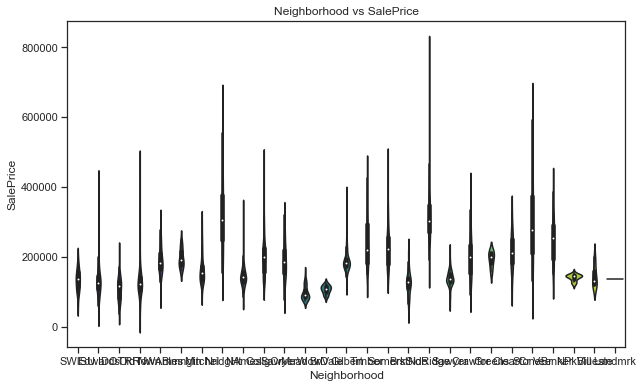

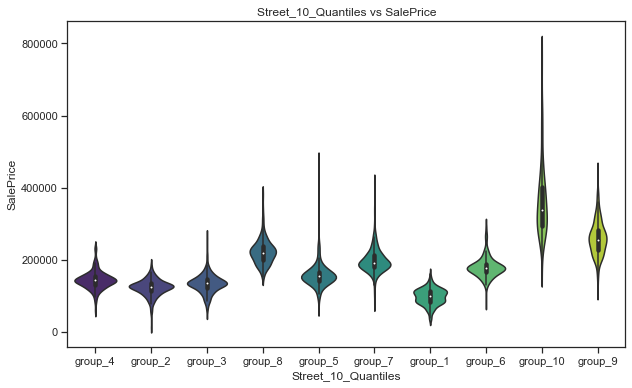

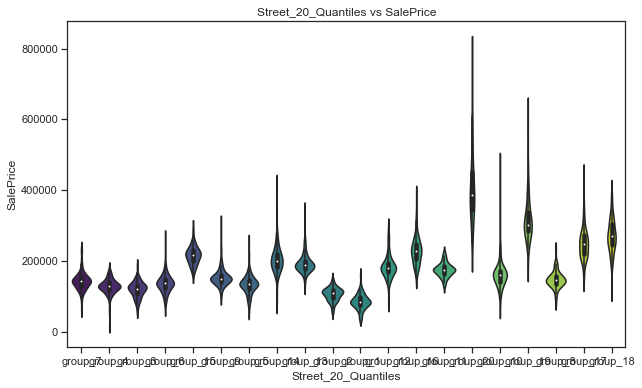

<IPython.core.display.Javascript object>

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns to plot
cols_to_plot = ['Neighborhood', 'Street_10_Quantiles', 'Street_20_Quantiles', 'SalePrice']

# Create a boxplot or violin plot for each categorical feature
for col in cols_to_plot[:-1]:
    plt.figure(figsize=(10,6))
    sns.violinplot(x=col, y='SalePrice', data=locations, palette='viridis')
    plt.title(f"{col} vs SalePrice")
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.show()


In [140]:
locations[["SalePrice", "Street_10_Quantiles"]]
#           , "Street_10_Quantiles", "Street_20_Quantiles", "SalePrice"]

SalePrice Street_10_Quantiles
0        126000             group_4
1        139500             group_2
2        139500             group_2
3        124900             group_2
4        114000             group_3
...         ...                 ...
2599     121000             group_3
2600     139600             group_2
2601     145000             group_4
2602     217500             group_8
2603     215000             group_8

[2604 rows x 2 columns]

<IPython.core.display.Javascript object>

In [ ]:
locations = ['Northridge Heights Park',
             'Ada Hayden Heritage Park',
             'Munn Woods',
             'Pammel Woods',
             'Emma McCarthy Park',
             'Jack Trice Stadium',
             'Ames Municipal Cemetery',
             'Carr Park',
             'Inis Grove Park',
             'Charles and June Calhoun Park',
             'Ada Hayden Heritage Park Lake',
             'North Grand Mall',
             'Donald and Ruth Furman Aquatic Center']


In [123]:
# adding street type to housing_cleaned
housing_cleaned = pd.merge(housing_cleaned, locations[['PID', 'street_type']], on='PID', how='left')


<IPython.core.display.Javascript object>

In [124]:
housing_cleaned

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
0     909176150        856     126000          30       RL    56.246899   
1     905476230       1049     139500         120       RL    42.000000   
2     905476230       1049     139500         120       RL    42.000000   
3     911128020       1001     124900          30  C (all)    60.000000   
4     535377150       1039     114000          70       RL    80.000000   
...         ...        ...        ...         ...      ...          ...   
2623  903205040        952     121000          30       RL    56.246899   
2624  905402060       1733     139600          20       RL    56.246899   
2625  909275030       2002     145000          90       RH    82.000000   
2626  907192040       1842     217500          60       RL    56.246899   
2627  906223180       1911     215000          60       RL    80.000000   

      LotArea Street     Alley LotShape LandContour Utilities LotConfig  \
0        7890   Pave  No_Alley      Reg         Lvl    AllPub    Corner   
1        4235   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
2        4235   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
3        6060   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
4        8146   Pave  No_Alley      Reg         Lvl    AllPub    Corner   
...       ...    ...       ...      ...         ...       ...       ...   
2623     8854   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
2624    13680   Pave  No_Alley      IR1         Lvl    AllPub   CulDSac   
2625     6270   Pave  No_Alley      Reg         HLS    AllPub    Inside   
2626     8826   Pave  No_Alley      Reg         Lvl    AllPub    Inside   
2627     9554   Pave  No_Alley      IR1         Lvl    AllPub    Inside   

     LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0          Gtl        SWISU       Norm       Norm     1Fam     1Story   
1          Gtl      Edwards       Norm       Norm   TwnhsE     1Story   
2          Gtl      Edwards       Norm       Norm   TwnhsE     1Story   
3          Gtl       IDOTRR       Norm       Norm     1Fam     1Story   
4          Gtl      OldTown       Norm       Norm     1Fam     2Story   
...        ...          ...        ...        ...      ...        ...   
2623       Gtl      BrkSide       Norm       Norm     1Fam     1.5Unf   
2624       Gtl      Edwards       Norm       Norm     1Fam     1Story   
2625       Gtl      Crawfor       Norm       Norm   Duplex     2Story   
2626       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
2627       Gtl      SawyerW       Norm       Norm     1Fam     2Story   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0               6            6       1939          1950     Gable  CompShg   
1               5            5       1984          1984     Gable  CompShg   
2               5            5       1984          1984     Gable  CompShg   
3               5            9       1930          2007       Hip  CompShg   
4               4            8       1900          2003     Gable  CompShg   
...           ...          ...        ...           ...       ...      ...   
2623            6            6       1916          1950     Gable  CompShg   
2624            3            5       1955          1955       Hip  CompShg   
2625            5            6       1949          1950     Gable  CompShg   
2626            7            5       2000          2000     Gable  CompShg   
2627            8            5       1993          1994     Gable  CompShg   

     Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0        Wd Sdng     Wd Sdng       None         0.0        TA        TA   
1        HdBoard     HdBoard    BrkFace       149.0        Gd        TA   
2        HdBoard     HdBoard    BrkFace       149.0        Gd        TA   
3        MetalSd     MetalSd       None         0.0        Gd        TA   
4        MetalSd     

<IPython.core.display.Javascript object>

In [3]:
locations = pd.read_csv("data/locations.csv", index_col=0)
locations

SalePrice Neighborhood                       Prop_Addr   latitude  \
PID                                                                            
909176150     126000        SWISU      436 HAYWARD AVE, AMES, USA  42.018564   
905476230     139500      Edwards         3416 WEST ST, AMES, USA  42.024855   
905476230     139500      Edwards         3416 WEST ST, AMES, USA  42.024855   
911128020     124900       IDOTRR         320 S 2ND ST, AMES, USA  42.021548   
535377150     114000      OldTown     1524 DOUGLAS AVE, AMES, USA  42.037391   
...              ...          ...                             ...        ...   
903205040     121000      BrkSide   1021 RIDGEWOOD AVE, AMES, USA  42.032102   
905402060     139600      Edwards        3619 MARY CIR, AMES, USA  42.027669   
909275030     145000      Crawfor  2140 SUNSET DR 2142, AMES, USA  42.020129   
907192040     217500      CollgCr    5319 CLEMENS BLVD, AMES, USA  42.016802   
906223180     215000      SawyerW      1025 VERMONT CT, AMES, USA  42.030997   

           longitude    street_name        Neighborhood_st street_type  
PID                                                                     
909176150 -93.651619    HAYWARD_AVE      SWISU_HAYWARD_AVE         AVE  
905476230 -93.663671        WEST_ST        Edwards_WEST_ST          ST  
905476230 -93.663671        WEST_ST        Edwards_WEST_ST          ST  
911128020 -93.614068       S_2ND_ST        IDOTRR_S_2ND_ST          ST  
535377150 -93.612207    DOUGLAS_AVE    OldTown_DOUGLAS_AVE         AVE  
...              ...            ...                    ...         ...  
903205040 -93.626373  RIDGEWOOD_AVE  BrkSide_RIDGEWOOD_AVE         AVE  
905402060 -93.666138       MARY_CIR       Edwards_MARY_CIR         CIR  
909275030 -93.643832      SUNSET_DR      Crawfor_SUNSET_DR          DR  
907192040 -93.689748   CLEMENS_BLVD   CollgCr_CLEMENS_BLVD        BLVD  
906223180 -93.682220     VERMONT_CT     SawyerW_VERMONT_CT          CT  

[2604 rows x 8 columns]

<IPython.core.display.Javascript object>

In [4]:
housing_cleaned = pd.read_csv("data/housing_cleaned.csv", index_col=0)

<IPython.core.display.Javascript object>

In [5]:
housing_cleaned

GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea  \
PID                                                                          
909176150        856     126000          30       RL          0.0     7890   
905476230       1049     139500         120       RL         42.0     4235   
911128020       1001     124900          30  C (all)         60.0     6060   
535377150       1039     114000          70       RL         80.0     8146   
534177230       1665     227000          60       RL         70.0     8400   
...              ...        ...         ...      ...          ...      ...   
903205040        952     121000          30       RL          0.0     8854   
905402060       1733     139600          20       RL          0.0    13680   
909275030       2002     145000          90       RH         82.0     6270   
907192040       1842     217500          60       RL          0.0     8826   
906223180       1911     215000          60       RL         80.0     9554   

          Street     Alley LotShape LandContour Utilities LotConfig LandSlope  \
PID                                                                             
909176150   Pave  No_Alley      Reg         Lvl    AllPub    Corner       Gtl   
905476230   Pave  No_Alley      Reg         Lvl    AllPub    Inside       Gtl   
911128020   Pave  No_Alley      Reg         Lvl    AllPub    Inside       Gtl   
535377150   Pave  No_Alley      Reg         Lvl    AllPub    Corner       Gtl   
534177230   Pave  No_Alley      Reg         Lvl    AllPub    Inside       Gtl   
...          ...       ...      ...         ...       ...       ...       ...   
903205040   Pave  No_Alley      Reg         Lvl    AllPub    Inside       Gtl   
905402060   Pave  No_Alley      IR1         Lvl    AllPub   CulDSac       Gtl   
909275030   Pave  No_Alley      Reg         HLS    AllPub    Inside       Gtl   
907192040   Pave  No_Alley      Reg         Lvl    AllPub    Inside       Gtl   
906223180   Pave  No_Alley      IR1         Lvl    AllPub    Inside       Gtl   

          Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
PID                                                                             
909176150        SWISU       Norm       Norm     1Fam     1Story            6   
905476230      Edwards       Norm       Norm   TwnhsE     1Story            5   
911128020       IDOTRR       Norm       Norm     1Fam     1Story            5   
535377150      OldTown       Norm       Norm     1Fam     2Story            4   
534177230       NWAmes       Norm       Norm     1Fam     2Story            8   
...                ...        ...        ...      ...        ...          ...   
903205040      BrkSide       Norm       Norm     1Fam     1.5Unf            6   
905402060      Edwards       Norm       Norm     1Fam     1Story            3   
909275030      Crawfor       Norm       Norm   Duplex     2Story            5   
907192040      CollgCr       Norm       Norm     1Fam     2Story            7   
906223180      SawyerW       Norm       Norm     1Fam     2Story            8   

           OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
PID                                                                  
909176150            6       1939          1950     Gable  CompShg   
905476230            5       1984          1984     Gable  CompShg   
911128020            9       1930          2007       Hip  CompShg   
535377150            8       1900          2003     Gable  CompShg   
534177230            6       2001          2001     Gable  CompShg   
...                ...        ...           ...       ...      ...   
903205040            6       1916          1950     Gable  CompShg   
905402060            5       1955          1955       Hip  CompShg   
909275030            6       1949          1950     Gable  CompShg   
907192040            5       2000          2000     Gable  CompShg   
906223180            5       1993          1994 

<IPython.core.display.Javascript object>